# Gaming Rate Prediction with Machine Learning

Gaming addiction is a very concerning gaming disorder and a public health issue in the world of today. as a matter of fact, According to a report from WHO on the 11th Revision of the International Classification of Diseases (ICD-11), gaming disorder is characterised by a pattern of gaming behaviour (also referred to as "digital gaming" or "video gaming") that is marked by a lack of control over gaming, a preference for gaming over other activities to the point where it trumps interests and daily activities, and a continuation or escalation of gaming despite negative outcomes. This analysis, tends to explore Long term gaming addiction traits to find correlated factors causing increase in rates globally.

The steps demonstrated in this notebook are:

    1) Loading the data
    2) Familiarizing with data/ data cleaning
    3) Visualizing the data
    4) Data Preprocessing & EDA
    5) Splitting the data (train and test set)
    6) Training the data
    7) Model Performance Comparison
    8) Statistical Tests
    9) Conclusion

## 1. Loading Data:

   The dataset is borrowed from a survey carried out within an academic environment by our lecturer Martin Kane at Teesside University, middlesbrough, between 2004 and 2016.

   The overview of this dataset is, it has 744 samples with 50 features.

In [1]:
#importing required libraries

import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
%matplotlib inline
import seaborn as sns
import sklearn
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#Loading data into dataframe
data_frame = pd.read_csv('videogameData1.csv')
data_frame.shape

(744, 50)

In [3]:
data_frame.head()

,Headache_During_Game,Headache_After_Game,Blurred_During_Game,Blurred_After_Game,Dry_or_redeye_during_Game,Dry_or_redeye_After_Game,Double_Vision_After_Game,Double_Vision_After_Game.1,Light_sense_During_Game,Light_Sense_After_Game,...,FF Pad,Jpad,Motion controller,Rhythm controller,Other Controllers,Gender,Years,Age,hours_per_week,Year interval
0,NaN,NaN,Y,NaN,Y,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,F,33.0,58,NaN,2004 - 2005
1,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,M,12.0,18,NaN,2004 - 2005
2,Y,NaN,Y,NaN,Y,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,M,10.0,18,NaN,2004 - 2005
3,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,...,NaN,NaN,NaN,NaN,NaN,M,10.0,18,NaN,2004 - 2005
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,...,NaN,NaN,NaN,NaN,NaN,M,15.0,19,NaN,2004 - 2005


## 2. Familiarizing with Data/ data Cleaning:
In this step, few dataframe methods are used to look into the data and its features.

In [4]:
#Listing the features of the dataset

data_frame.columns

Index(['Headache_During_Game', 'Headache_After_Game', 'Blurred_During_Game',
       'Blurred_After_Game', 'Dry_or_redeye_during_Game',
       'Dry_or_redeye_After_Game', 'Double_Vision_After_Game',
       'Double_Vision_After_Game.1', 'Light_sense_During_Game',
       'Light_Sense_After_Game', 'Other_Eye_Affects', 'Very Good Posture',
       'Good Posture', 'Fair Posture', 'Poor Posture', 'Very Poor Posture',
       'Ok', 'Awful', 'Neck discomfort', 'shoulders discomfort',
       'lower back discomfort', 'Hands discomfort', 'Wrists discomfort/pain',
       'Fingers discomfort/blisters', 'Thumbs discomfort/blisters',
       'Repetitive Strain Injury', 'Other causes of injuries',
       'Motion controllers', 'Arcade genre', 'Puzzle genre', 'RPG genre',
       'Sim genre', 'RTS genre', 'Driving genre', 'FPS genre',
       'Platform genre', 'Rhythm genre', 'Sport genre', 'Other Genres',
       'Key/Mouse controller', 'FF Pad', 'Jpad', 'Motion controller',
       'Rhythm controller', 'Other

In [5]:
#Renaming the column names for cohesion

data_frame.columns = ['Headache_During_Game', 'Headache_After_Game', 'Blurred_During_Game',
       'Blurred_After_Game', 'Dry_or_redeye_during_Game',
       'Dry_or_redeye_After_Game', 'Double_Vision_During_Game',
       'Double_Vision_After_Game', 'Light_sense_During_Game',
       'Light_Sense_After_Game', 'Other_Eye_Effects', 'Very_Good_Posture',
       'Good_Posture', 'Fair_Posture', 'Poor_Posture', 'Very_Poor_Posture',
       'Ok', 'Awful', 'Neck_discomfort', 'shoulders_discomfort',
       'lower_back_discomfort', 'Hands_discomfort', 'Wrists_discomfort',
       'Fingers_discomfort', 'Thumbs_discomfort',
       'Repetitive_Strain_Injury', 'Other_causes_of_injuries',
       'Motion_controllers', 'Arcade_genre', 'Puzzle_genre', 'RPG_genre',
       'Sim_genre', 'RTS_genre', 'Driving_genre', 'FPS_genre',
       'Platform_genre', 'Rhythm_genre', 'Sport_genre', 'Other_Genres',
       'Key_Mouse_controller', 'FF_Pad', 'Jpad', 'Motion_controller',
       'Rhythm_controller', 'Other_Controllers', 'Gender', 'Years', 'Age',
       'hours_per_week', 'Year_interval']

data_frame.columns

Index(['Headache_During_Game', 'Headache_After_Game', 'Blurred_During_Game',
       'Blurred_After_Game', 'Dry_or_redeye_during_Game',
       'Dry_or_redeye_After_Game', 'Double_Vision_During_Game',
       'Double_Vision_After_Game', 'Light_sense_During_Game',
       'Light_Sense_After_Game', 'Other_Eye_Effects', 'Very_Good_Posture',
       'Good_Posture', 'Fair_Posture', 'Poor_Posture', 'Very_Poor_Posture',
       'Ok', 'Awful', 'Neck_discomfort', 'shoulders_discomfort',
       'lower_back_discomfort', 'Hands_discomfort', 'Wrists_discomfort',
       'Fingers_discomfort', 'Thumbs_discomfort', 'Repetitive_Strain_Injury',
       'Other_causes_of_injuries', 'Motion_controllers', 'Arcade_genre',
       'Puzzle_genre', 'RPG_genre', 'Sim_genre', 'RTS_genre', 'Driving_genre',
       'FPS_genre', 'Platform_genre', 'Rhythm_genre', 'Sport_genre',
       'Other_Genres', 'Key_Mouse_controller', 'FF_Pad', 'Jpad',
       'Motion_controller', 'Rhythm_controller', 'Other_Controllers', 'Gender',
      

In [6]:
#check for null

data_frame.isnull().sum()

Headache_During_Game         429
Headache_After_Game          402
Blurred_During_Game          608
Blurred_After_Game           547
Dry_or_redeye_during_Game    525
Dry_or_redeye_After_Game     470
Double_Vision_During_Game    689
Double_Vision_After_Game     678
Light_sense_During_Game      627
Light_Sense_After_Game       526
Other_Eye_Effects            728
Very_Good_Posture            665
Good_Posture                 428
Fair_Posture                 349
Poor_Posture                 489
Very_Poor_Posture            664
Ok                           722
Awful                        740
Neck_discomfort              417
shoulders_discomfort         552
lower_back_discomfort        489
Hands_discomfort             620
Wrists_discomfort            555
Fingers_discomfort           582
Thumbs_discomfort            571
Repetitive_Strain_Injury       0
Other_causes_of_injuries     706
Motion_controllers             0
Arcade_genre                 689
Puzzle_genre                 670
RPG_genre 

In [7]:
#Listing other causes of injuries

Other_causes_of_injuries = data_frame.Other_causes_of_injuries.unique()
print("Other injuries:", len(Other_causes_of_injuries))
Other_causes_of_injuries

Other injuries: 26


array([nan, 'Yes', 'Games', 'No', 'Concentrating up close', 'RSI',
       'Checkout', 'Sport', 'Typing', 'Not', 'Computing', 'CTS',
       'Injusry+overuse', 'Not specified', 'Oculus Rift',
       'gGuitar Playing', 'Rugby Injury', 'Partially', 'Pen',
       'Basketball Elbow', 'WoW', 'Sitting', 'Tablet',
       'No, heavy lifting at work', 'gamEs', 'No '], dtype=object)

In [8]:
data_frame.describe

<bound method NDFrame.describe of     Headache_During_Game Headache_After_Game Blurred_During_Game  \
0                    NaN                 NaN                   Y   
1                    NaN                 NaN                 NaN   
2                      Y                 NaN                   Y   
3                      Y                 NaN                 NaN   
4                    NaN                 NaN                 NaN   
..                   ...                 ...                 ...   
739                    Y                   Y                   Y   
740                    Y                   Y                 NaN   
741                  NaN                 NaN                 NaN   
742                    Y                   Y                 NaN   
743                  NaN                 NaN                 NaN   

    Blurred_After_Game Dry_or_redeye_during_Game Dry_or_redeye_After_Game  \
0                  NaN                         Y                      Na

In [9]:
#Information about the dataset

data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 50 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Headache_During_Game       315 non-null    object 
 1   Headache_After_Game        342 non-null    object 
 2   Blurred_During_Game        136 non-null    object 
 3   Blurred_After_Game         197 non-null    object 
 4   Dry_or_redeye_during_Game  219 non-null    object 
 5   Dry_or_redeye_After_Game   274 non-null    object 
 6   Double_Vision_During_Game  55 non-null     object 
 7   Double_Vision_After_Game   66 non-null     object 
 8   Light_sense_During_Game    117 non-null    object 
 9   Light_Sense_After_Game     218 non-null    object 
 10  Other_Eye_Effects          16 non-null     object 
 11  Very_Good_Posture          79 non-null     object 
 12  Good_Posture               316 non-null    object 
 13  Fair_Posture               395 non-null    object 

In [10]:
data_frame.Age.value_counts()

Age
19                253
18                196
20                135
21                 48
22                 41
23                 21
24                 14
25                 10
26                  7
30                  4
28                  3
29                  2
2                   1
27                  1
32                  1
16                  1
58                  1
One page only       1
33                  1
10                  1
17                  1
Name: count, dtype: int64

In [11]:
data_frame.Year_interval.value_counts()

Year_interval
2015 - 2016    166
2013 - 2014    118
2011 - 2012    101
2016 - 2017     77
2012 - 2013     65
2008 - 2009     53
2007 - 2008     49
2010 - 2011     44
2004 - 2005     39
2009 - 2010     32
Name: count, dtype: int64

In [12]:
#Listing other genres
Other_Genres = data_frame.Other_Genres.unique()
print("Other Genres", len(Other_Genres))
Other_Genres

Other Genres 34


array([nan, 'MMO', 'Crap games', 'Y', 'Adventure', 'Fighting',
       'Hack n Slash', 'Action', '3P Adventure', 'MMORPG', 'Pen & Paper',
       'Turn-Strategy', 'Sandbox', 'Jandook', 'Moba', 'Fight',
       'Minecraft', 'Minesweeper', 'Horror', 'Soundbox', '3FS', 'Art',
       '3PS/Action', 'Mobile', 'Survival Horror', 'Stealth', 'RoGue-like',
       'Tower Defense', 'Card', 'Survival', 'Tanks', 'lots', 'MOBA',
       'WoW'], dtype=object)

In [13]:
data_frame.Other_Genres.value_counts()

Other_Genres
Moba               30
Fighting           18
Adventure          17
Action             13
MMO                 9
Horror              5
Y                   4
Fight               3
MMORPG              2
Tanks               2
Stealth             2
Survival Horror     1
RoGue-like          1
Survival            1
Tower Defense       1
Card                1
3PS/Action          1
lots                1
MOBA                1
Mobile              1
Minesweeper         1
Art                 1
3FS                 1
Soundbox            1
Crap games          1
Minecraft           1
Jandook             1
Sandbox             1
Turn-Strategy       1
Pen & Paper         1
3P Adventure        1
Hack n Slash        1
WoW                 1
Name: count, dtype: int64

#### Initial Observations:
1. Most of the categorical columns have missing values. 
2. None of the other columns have any missing values. 
3. Majority of null and NAN values are from columns that require yes or no feedback.
4. There are 26 other types of gaming injuries listed
5. majority of people that completed the survey are between 18 and 20
6. Survey was carried out between 2004 and 2017
7. 2015 - 2016 recorded the highest number of surveys at 166 entries.
8. There were 34 other genres mentioned and the most mentioned was MOBA
9. Few records of years spent playing game were more than players age
10. Years and Age has the least null values.
11. Few columns need to be converted to numerical columns
12. encoding needed on most columns for modeling


In [14]:
#create a new dataframe for analysis

data_frame1 = pd.DataFrame(data_frame, columns =['Gender','Years','Age', 'hours_per_week','Year_interval','Arcade_genre', 'Puzzle_genre', 
    'RPG_genre', 'Sim_genre', 'RTS_genre', 'Driving_genre', 'FPS_genre','Platform_genre', 'Rhythm_genre', 'Sport_genre',
    'Other_Genres'])

data_frame1


,Gender,Years,Age,hours_per_week,Year_interval,Arcade_genre,Puzzle_genre,RPG_genre,Sim_genre,RTS_genre,Driving_genre,FPS_genre,Platform_genre,Rhythm_genre,Sport_genre,Other_Genres
0,F,33.0,58,NaN,2004 - 2005,NaN,Y,NaN,NaN,Y,NaN,NaN,Y,NaN,NaN,NaN
1,M,12.0,18,NaN,2004 - 2005,NaN,NaN,Y,NaN,NaN,NaN,Y,Y,NaN,NaN,MMO
2,M,10.0,18,NaN,2004 - 2005,NaN,NaN,Y,Y,Y,NaN,Y,Y,NaN,Y,Crap games
3,M,10.0,18,NaN,2004 - 2005,NaN,NaN,Y,NaN,Y,NaN,Y,NaN,NaN,Y,NaN
4,M,15.0,19,NaN,2004 - 2005,Y,NaN,Y,NaN,NaN,Y,Y,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,M,17.0,20,55,2016 - 2017,NaN,NaN,NaN,Y,NaN,NaN,Y,NaN,NaN,NaN,Y
740,M,12.0,20,20,2016 - 2017,NaN,NaN,Y,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN
741,M,10.0,20,15,2016 - 2017,NaN,NaN,Y,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN
742,M,17.0,21,25,2016 - 2017,Y,NaN,Y,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN


In [15]:
#replace null with no
#data_frame1 = pd.DataFrame(data_frame1)

# Listing of columns to replace null values with 'No'
genre_columns = ['Arcade_genre', 'Puzzle_genre','RPG_genre', 'Sim_genre', 'RTS_genre', 'Driving_genre', 
                      'FPS_genre','Platform_genre', 'Rhythm_genre', 'Sport_genre','Other_Genres']

for column in data_frame1[genre_columns].columns:
    data_frame1[column] = data_frame1[column].where(data_frame1[column].isna(), 'Yes')

for column in data_frame1[genre_columns].columns:
   data_frame1[column] = data_frame1[column].fillna('No')

print(data_frame1.shape)
# get unique values in our set of columns 
for col in data_frame1[genre_columns].columns:
  print(col, ': ', data_frame1[col].unique())

(744, 16)
Arcade_genre :  ['No' 'Yes']
Puzzle_genre :  ['Yes' 'No']
RPG_genre :  ['No' 'Yes']
Sim_genre :  ['No' 'Yes']
RTS_genre :  ['Yes' 'No']
Driving_genre :  ['No' 'Yes']
FPS_genre :  ['No' 'Yes']
Platform_genre :  ['Yes' 'No']
Rhythm_genre :  ['No' 'Yes']
Sport_genre :  ['No' 'Yes']
Other_Genres :  ['No' 'Yes']


In [16]:
# # Function to replace 'Y' with 'Yes' for selected columns
# def replace_letter(column):
#     return column.replace('Y', 'Yes')

# # Apply the replace_letter function to selected columns using applymap
# data_frame1[genre_columns] = data_frame1[genre_columns].applymap(replace_letter)

# # Display the modified DataFrame
# print(data_frame1)

In [17]:
# # Function to replace 'Y' with 'Yes' for selected columns
# def replace_letter(column):
#     return column.replace('N', 'No')

# # Apply the replace_letter function to selected columns using applymap
# data_frame1[genre_columns] = data_frame1[genre_columns].applymap(replace_letter)

# # Display the modified DataFrame
# print(data_frame1)

In [18]:
#Remove null values from 'Column1'
#data_frame1['Age'].dropna(inplace=True)
#data_frame1['Years'].dropna(inplace=True)
#data_frame1['hours_per_week'].dropna(inplace=True)

# Remove null values from 'Column1' and 'Column2'
data_frame1.dropna(subset=['Age', 'Years', 'hours_per_week'], inplace=True)

# Display the updated DataFrame
print(data_frame1)

    Gender  Years Age hours_per_week Year_interval Arcade_genre Puzzle_genre  \
39       M   14.0  18             21   2008 - 2009           No           No   
40       M   12.0  19             40   2008 - 2009           No           No   
41       M    9.0  19             20   2008 - 2009           No           No   
42       M   15.0  20             22   2008 - 2009           No           No   
43       M   15.0  20             10   2008 - 2009           No           No   
..     ...    ...  ..            ...           ...          ...          ...   
739      M   17.0  20             55   2016 - 2017           No           No   
740      M   12.0  20             20   2016 - 2017           No           No   
741      M   10.0  20             15   2016 - 2017           No           No   
742      M   17.0  21             25   2016 - 2017          Yes           No   
743      M   22.0  26             56   2016 - 2017          Yes           No   

    RPG_genre Sim_genre RTS_genre Drivi

In [19]:
# Convert 'Column1' from string to integer
data_frame1['Age'] = data_frame1['Age'].astype(int)

# Check the data types after conversion
print(data_frame1.dtypes)

Gender             object
Years             float64
Age                 int32
hours_per_week     object
Year_interval      object
Arcade_genre       object
Puzzle_genre       object
RPG_genre          object
Sim_genre          object
RTS_genre          object
Driving_genre      object
FPS_genre          object
Platform_genre     object
Rhythm_genre       object
Sport_genre        object
Other_Genres       object
dtype: object


In [20]:
data_frame1['gaming_start_age'] = data_frame1['Age'] - data_frame1['Years']
data_frame1

,Gender,Years,Age,hours_per_week,Year_interval,Arcade_genre,Puzzle_genre,RPG_genre,Sim_genre,RTS_genre,Driving_genre,FPS_genre,Platform_genre,Rhythm_genre,Sport_genre,Other_Genres,gaming_start_age
39,M,14.0,18,21,2008 - 2009,No,No,Yes,No,Yes,No,Yes,No,No,No,No,4.0
40,M,12.0,19,40,2008 - 2009,No,No,Yes,No,No,No,Yes,Yes,No,No,No,7.0
41,M,9.0,19,20,2008 - 2009,No,No,No,No,No,No,Yes,No,No,Yes,No,10.0
42,M,15.0,20,22,2008 - 2009,No,No,Yes,No,No,No,Yes,No,No,No,Yes,5.0
43,M,15.0,20,10,2008 - 2009,No,No,Yes,No,No,Yes,No,No,No,Yes,No,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,M,17.0,20,55,2016 - 2017,No,No,No,Yes,No,No,Yes,No,No,No,Yes,3.0
740,M,12.0,20,20,2016 - 2017,No,No,Yes,No,No,No,Yes,No,No,No,No,8.0
741,M,10.0,20,15,2016 - 2017,No,No,Yes,No,No,No,Yes,No,No,No,No,10.0
742,M,17.0,21,25,2016 - 2017,Yes,No,Yes,No,No,No,Yes,No,No,No,No,4.0


In [21]:
#average gaming age
# Convert negative values in 'Numbers' column to 'Negative'
data_frame1['gaming_start_age'] = data_frame1['gaming_start_age'].apply(lambda x: 0 if x < 0 else x)

# Display the modified DataFrame
print(data_frame1)


    Gender  Years  Age hours_per_week Year_interval Arcade_genre Puzzle_genre  \
39       M   14.0   18             21   2008 - 2009           No           No   
40       M   12.0   19             40   2008 - 2009           No           No   
41       M    9.0   19             20   2008 - 2009           No           No   
42       M   15.0   20             22   2008 - 2009           No           No   
43       M   15.0   20             10   2008 - 2009           No           No   
..     ...    ...  ...            ...           ...          ...          ...   
739      M   17.0   20             55   2016 - 2017           No           No   
740      M   12.0   20             20   2016 - 2017           No           No   
741      M   10.0   20             15   2016 - 2017           No           No   
742      M   17.0   21             25   2016 - 2017          Yes           No   
743      M   22.0   26             56   2016 - 2017          Yes           No   

    RPG_genre Sim_genre RTS

In [22]:
data_frame1.sort_values('gaming_start_age', ascending=False)

,Gender,Years,Age,hours_per_week,Year_interval,Arcade_genre,Puzzle_genre,RPG_genre,Sim_genre,RTS_genre,Driving_genre,FPS_genre,Platform_genre,Rhythm_genre,Sport_genre,Other_Genres,gaming_start_age
225,M,2.0,25,6,2011 - 2012,Yes,No,No,No,No,Yes,Yes,Yes,No,No,No,23.0
299,M,15.0,33,12,2011 - 2012,Yes,No,Yes,No,No,No,Yes,No,No,No,No,18.0
46,F,6.0,22,5,2008 - 2009,No,No,Yes,No,No,No,No,No,No,No,No,16.0
460,F,3.0,19,33,2013 - 2014,Yes,Yes,Yes,No,No,No,Yes,Yes,No,No,No,16.0
71,M,7.0,23,28,2008 - 2009,No,No,No,No,No,No,Yes,No,No,No,No,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,M,16.0,18,9,2007 - 2008,No,No,Yes,No,No,No,Yes,No,No,No,No,2.0
486,M,18.0,2,12,2013 - 2014,No,No,No,Yes,Yes,No,Yes,No,No,No,No,0.0
50,M,14.0,10,55,2008 - 2009,No,No,Yes,No,Yes,No,Yes,No,No,No,No,0.0
280,M,23.0,22,65,2011 - 2012,No,No,Yes,Yes,No,No,Yes,No,No,No,No,0.0


In [23]:
# # Replace non-digit characters with 0 in 'hours_per_week'
data_frame1['hours_per_week'] = data_frame1['hours_per_week'].str.replace(r'\D', '0')

In [24]:
# Convert 'hours_per_week' column to numeric (ignore errors to handle strings)
data_frame1['hours_per_week'] = pd.to_numeric(data_frame1['hours_per_week'], errors='coerce')

# Replace NaN values in 'hours_per_week' column with the mean of that column
mean_hours_per_week = data_frame1['hours_per_week'].mean()
data_frame1['hours_per_week'].fillna(mean_hours_per_week, inplace=True)


In [25]:
data_frame1.sort_values('hours_per_week', ascending=False).head(20)


,Gender,Years,Age,hours_per_week,Year_interval,Arcade_genre,Puzzle_genre,RPG_genre,Sim_genre,RTS_genre,Driving_genre,FPS_genre,Platform_genre,Rhythm_genre,Sport_genre,Other_Genres,gaming_start_age
708,M,12.0,18,100.0,2016 - 2017,No,No,Yes,No,No,No,No,No,No,No,No,6.0
483,M,19.0,22,100.0,2013 - 2014,No,No,Yes,No,Yes,No,No,No,No,No,Yes,3.0
666,F,15.0,19,100.0,2015 - 2016,No,No,Yes,No,Yes,No,No,No,No,No,Yes,4.0
158,M,18.0,20,90.0,2009 - 2010,No,No,No,No,No,No,Yes,No,No,No,No,2.0
183,M,11.0,18,85.0,2010 - 2011,No,No,Yes,No,Yes,No,Yes,No,No,No,No,7.0
336,M,11.0,19,85.0,2012 - 2013,No,No,Yes,No,Yes,No,Yes,No,No,No,No,8.0
337,M,10.0,20,85.0,2012 - 2013,No,Yes,Yes,No,Yes,No,No,No,No,No,No,10.0
173,F,15.0,19,85.0,2010 - 2011,No,No,Yes,No,Yes,No,Yes,No,No,No,No,4.0
482,M,13.0,19,80.0,2013 - 2014,No,No,No,No,No,Yes,Yes,No,No,Yes,No,6.0
354,M,16.0,22,80.0,2012 - 2013,No,Yes,No,No,Yes,No,Yes,No,No,No,No,6.0


In [26]:
data_frame1.head(8)

,Gender,Years,Age,hours_per_week,Year_interval,Arcade_genre,Puzzle_genre,RPG_genre,Sim_genre,RTS_genre,Driving_genre,FPS_genre,Platform_genre,Rhythm_genre,Sport_genre,Other_Genres,gaming_start_age
39,M,14.0,18,21.0,2008 - 2009,No,No,Yes,No,Yes,No,Yes,No,No,No,No,4.0
40,M,12.0,19,40.0,2008 - 2009,No,No,Yes,No,No,No,Yes,Yes,No,No,No,7.0
41,M,9.0,19,20.0,2008 - 2009,No,No,No,No,No,No,Yes,No,No,Yes,No,10.0
42,M,15.0,20,22.0,2008 - 2009,No,No,Yes,No,No,No,Yes,No,No,No,Yes,5.0
43,M,15.0,20,10.0,2008 - 2009,No,No,Yes,No,No,Yes,No,No,No,Yes,No,5.0
44,M,13.0,19,12.0,2008 - 2009,Yes,Yes,No,No,No,No,Yes,Yes,No,No,No,6.0
45,M,14.0,18,75.0,2008 - 2009,No,No,Yes,No,No,No,Yes,No,No,No,No,4.0
46,F,6.0,22,5.0,2008 - 2009,No,No,Yes,No,No,No,No,No,No,No,No,16.0


In [27]:
#Average gaming time per week should be 18 hours or within 15 - 20 hours => threshold_per_week = 20

# Convert 'hours/week' column to numeric (integers or floats)
data_frame1['hours_per_week'] = pd.to_numeric(data_frame1['hours_per_week'], errors='coerce')

# Total hours in a week (assuming 168 hours in a week)
total_hours_in_week = 168

#average gaming time per week should be 18 hours or within 15 - 20 hours
threshold_per_week = 20

# Calculate addiction rate and create a new column
data_frame1['Percentage_Addiction_probability'] = ((data_frame1['hours_per_week'] / threshold_per_week) * 
                                                   (data_frame1['Years']/data_frame1['Age'])) * 100

# Format 'addiction_rate_percentage' column to two decimal places
data_frame1['Percentage_Addiction_probability'].round(2)

# Display the DataFrame with the new 'addiction_rate' column
data_frame1.head(8)

,Gender,Years,Age,hours_per_week,Year_interval,Arcade_genre,Puzzle_genre,RPG_genre,Sim_genre,RTS_genre,Driving_genre,FPS_genre,Platform_genre,Rhythm_genre,Sport_genre,Other_Genres,gaming_start_age,Percentage_Addiction_probability
39,M,14.0,18,21.0,2008 - 2009,No,No,Yes,No,Yes,No,Yes,No,No,No,No,4.0,81.666667
40,M,12.0,19,40.0,2008 - 2009,No,No,Yes,No,No,No,Yes,Yes,No,No,No,7.0,126.315789
41,M,9.0,19,20.0,2008 - 2009,No,No,No,No,No,No,Yes,No,No,Yes,No,10.0,47.368421
42,M,15.0,20,22.0,2008 - 2009,No,No,Yes,No,No,No,Yes,No,No,No,Yes,5.0,82.500000
43,M,15.0,20,10.0,2008 - 2009,No,No,Yes,No,No,Yes,No,No,No,Yes,No,5.0,37.500000
44,M,13.0,19,12.0,2008 - 2009,Yes,Yes,No,No,No,No,Yes,Yes,No,No,No,6.0,41.052632
45,M,14.0,18,75.0,2008 - 2009,No,No,Yes,No,No,No,Yes,No,No,No,No,4.0,291.666667
46,F,6.0,22,5.0,2008 - 2009,No,No,Yes,No,No,No,No,No,No,No,No,16.0,6.818182


In [28]:
data_frame1.sort_values('Percentage_Addiction_probability', ascending=False).head(10)

,Gender,Years,Age,hours_per_week,Year_interval,Arcade_genre,Puzzle_genre,RPG_genre,Sim_genre,RTS_genre,Driving_genre,FPS_genre,Platform_genre,Rhythm_genre,Sport_genre,Other_Genres,gaming_start_age,Percentage_Addiction_probability
486,M,18.0,2,12.0,2013 - 2014,No,No,No,Yes,Yes,No,Yes,No,No,No,No,0.0,540.000000
483,M,19.0,22,100.0,2013 - 2014,No,No,Yes,No,Yes,No,No,No,No,No,Yes,3.0,431.818182
158,M,18.0,20,90.0,2009 - 2010,No,No,No,No,No,No,Yes,No,No,No,No,2.0,405.000000
666,F,15.0,19,100.0,2015 - 2016,No,No,Yes,No,Yes,No,No,No,No,No,Yes,4.0,394.736842
50,M,14.0,10,55.0,2008 - 2009,No,No,Yes,No,Yes,No,Yes,No,No,No,No,0.0,385.000000
280,M,23.0,22,65.0,2011 - 2012,No,No,Yes,Yes,No,No,Yes,No,No,No,No,0.0,339.772727
173,F,15.0,19,85.0,2010 - 2011,No,No,Yes,No,Yes,No,Yes,No,No,No,No,4.0,335.526316
92,M,15.0,18,80.0,2007 - 2008,No,No,No,No,Yes,Yes,No,Yes,No,No,No,3.0,333.333333
708,M,12.0,18,100.0,2016 - 2017,No,No,Yes,No,No,No,No,No,No,No,No,6.0,333.333333
334,M,23.0,26,75.0,2012 - 2013,No,No,Yes,No,Yes,No,Yes,No,No,No,No,3.0,331.730769


In [29]:
# #Renaming the columns names for cohesion

# data_frame1.columns = ['Gender', 'Years', 'Age','hours_per_week', 'Year_interval','gaming_start_age']
# data_frame1.columns

In [30]:
data_frame1.Percentage_Addiction_probability.value_counts().head()

Percentage_Addiction_probability
78.947368    9
50.000000    8
83.333333    7
37.500000    7
63.157895    6
Name: count, dtype: int64

In [31]:
data_frame1.Year_interval.value_counts()

Year_interval
2015 - 2016    166
2013 - 2014    117
2011 - 2012    101
2016 - 2017     76
2012 - 2013     63
2008 - 2009     53
2007 - 2008     49
2010 - 2011     44
2009 - 2010     32
Name: count, dtype: int64

In [32]:
# Assuming 'Year interval' contains strings in the format 'YYYY-YYYY'
data_frame1['Survey_year'] = data_frame1['Year_interval'].str.split('-').str[0].astype(int)

# Sort the DataFrame based on 'start_year'
data_frame1 = data_frame1.sort_values(by='Survey_year')

data_frame1 = data_frame1.drop('Year_interval', axis=1)

# Display the first 2 rows to check the result
print(data_frame1.head(5))


    Gender  Years  Age  hours_per_week Arcade_genre Puzzle_genre RPG_genre  \
97       M   14.0   20            22.0           No           No        No   
113      F    8.0   20             8.0           No           No       Yes   
112      M   21.0   23             4.0           No          Yes       Yes   
111      M    8.0   18            20.0           No           No       Yes   
110      M   13.0   19            55.0           No           No       Yes   

    Sim_genre RTS_genre Driving_genre FPS_genre Platform_genre Rhythm_genre  \
97         No       Yes            No       Yes            Yes           No   
113        No        No            No        No             No           No   
112        No        No            No        No            Yes           No   
111        No       Yes            No       Yes             No           No   
110        No       Yes            No       Yes             No           No   

    Sport_genre Other_Genres  gaming_start_age  \
97    

In [33]:
data_frame1['Age'] =  pd.to_numeric(data_frame1['Age'], errors='coerce')
data_frame1['hours_per_week'] =  pd.to_numeric(data_frame1['hours_per_week'], errors='coerce')
data_frame1 = data_frame1[data_frame1['Gender']!='Both']
#data_frame1 = data_frame1.drop('Other_Genres', axis=1) Percentage_Addiction_probability
print(data_frame1.shape)
data_frame1.head(5)

(700, 18)


,Gender,Years,Age,hours_per_week,Arcade_genre,Puzzle_genre,RPG_genre,Sim_genre,RTS_genre,Driving_genre,FPS_genre,Platform_genre,Rhythm_genre,Sport_genre,Other_Genres,gaming_start_age,Percentage_Addiction_probability,Survey_year
97,M,14.0,20,22.0,No,No,No,No,Yes,No,Yes,Yes,No,No,No,6.0,77.000000,2007
113,F,8.0,20,8.0,No,No,Yes,No,No,No,No,No,No,No,Yes,12.0,16.000000,2007
112,M,21.0,23,4.0,No,Yes,Yes,No,No,No,No,Yes,No,No,No,2.0,18.260870,2007
111,M,8.0,18,20.0,No,No,Yes,No,Yes,No,Yes,No,No,No,No,10.0,44.444444,2007
110,M,13.0,19,55.0,No,No,Yes,No,Yes,No,Yes,No,No,No,No,6.0,188.157895,2007


# 3. Visualizing the data:
Few plots and graphs are displayed to find how the data is distributed and the how features are related to each other.

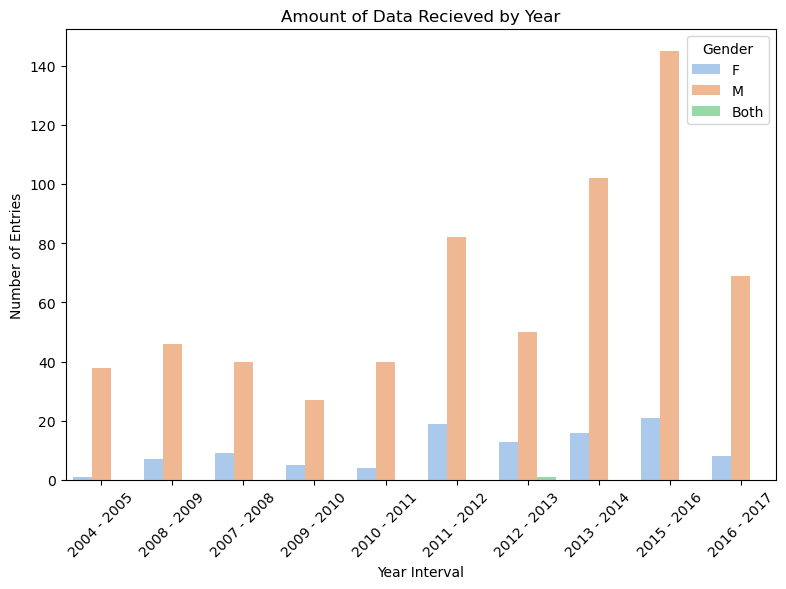

In [34]:
# Count occurrences 
#word_counts = data_frame.Year_interval.value_counts()

# Plotting the count of occurrences
plt.figure(figsize=(8, 6))
sns.countplot(x='Year_interval', hue='Gender', data=data_frame, palette='pastel')
#word_counts.plot(kind='bar', color='skyblue')
plt.title('Amount of Data Recieved by Year')
plt.xlabel('Year Interval')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot or save it to a file
plt.show()  # Show the plot
# plt.savefig('string_occurrences_plot.png')  # Save the plot to a file (uncomment to save)


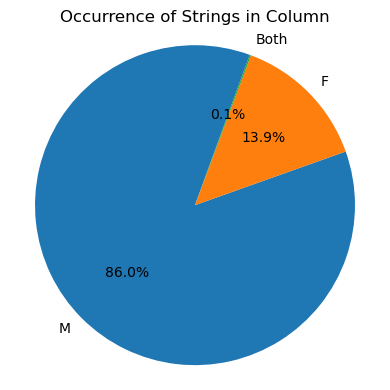

In [35]:
# Count occurrences of Gender
word_counts = data_frame['Gender'].value_counts()

# Plotting a pie chart for the count of occurrences
plt.figure(figsize=(4, 4))
plt.pie(word_counts, labels=word_counts.index, autopct='%1.1f%%', startangle=70)
plt.title('Occurrence of Strings in Column')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()

# Show the plot
plt.show()


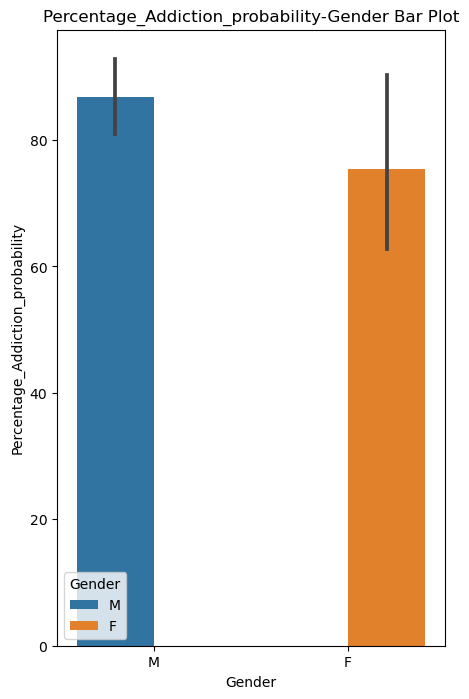

In [36]:
#Gender and suicide count bar plot

plt.figure(figsize=(5,8))
sns.barplot(x = "Gender", y = "Percentage_Addiction_probability", hue = "Gender", data = data_frame1)
plt.title('Percentage_Addiction_probability-Gender Bar Plot')
plt.show()

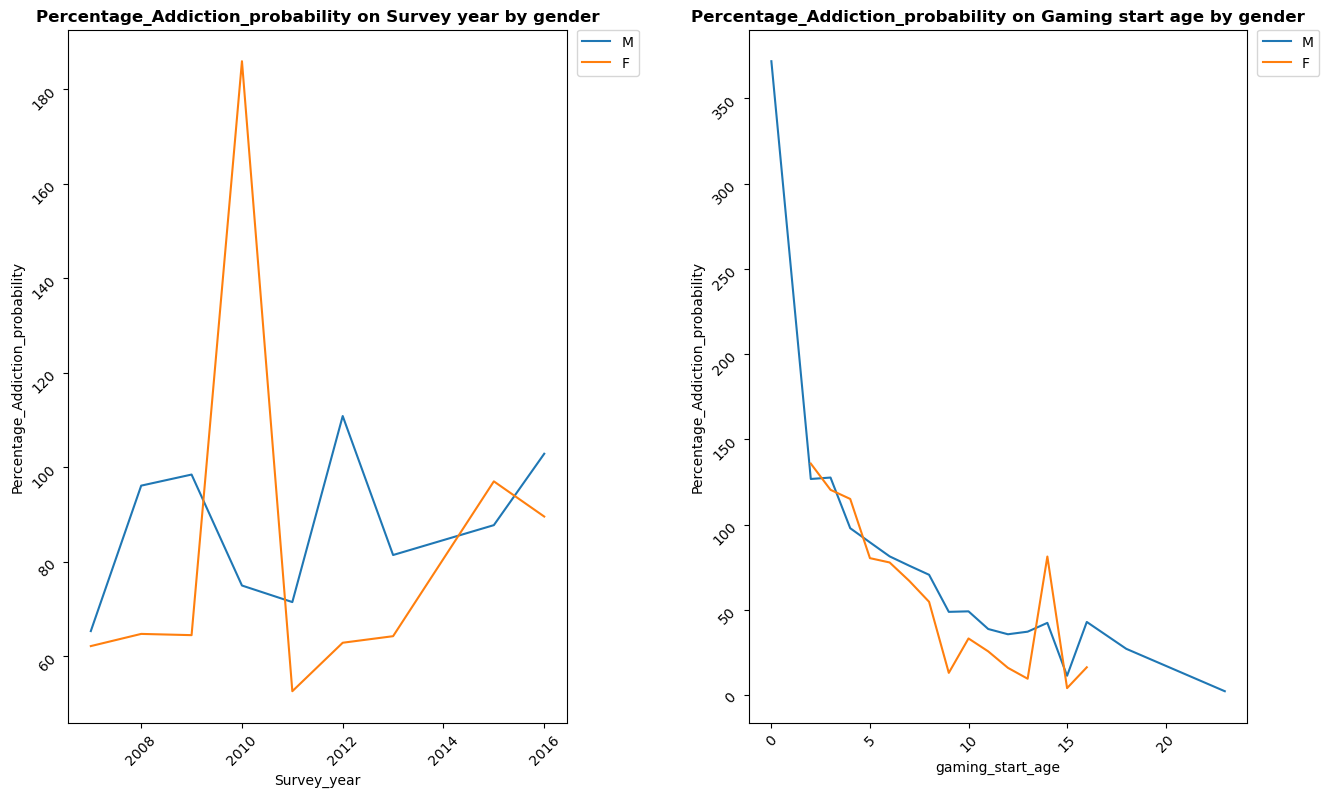

In [37]:
fig,ax =  plt.subplots( 1, 2, figsize = ( 15, 10))
  
fig.tight_layout(pad=10.0)

sns.lineplot(data=data_frame1, x='Survey_year', y='Percentage_Addiction_probability', hue='Gender', errorbar=None, ax=ax[0])
ax[0].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax[0].set_title('Percentage_Addiction_probability on Survey year by gender',weight = 'bold')
ax[0].tick_params(labelrotation=45)

sns.lineplot(data=data_frame1, x='gaming_start_age', y='Percentage_Addiction_probability', hue='Gender', errorbar=None, ax=ax[1])
ax[1].legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax[1].set_title('Percentage_Addiction_probability on Gaming start age by gender',weight = 'bold')
ax[1].tick_params(labelrotation=45)


plt.show()

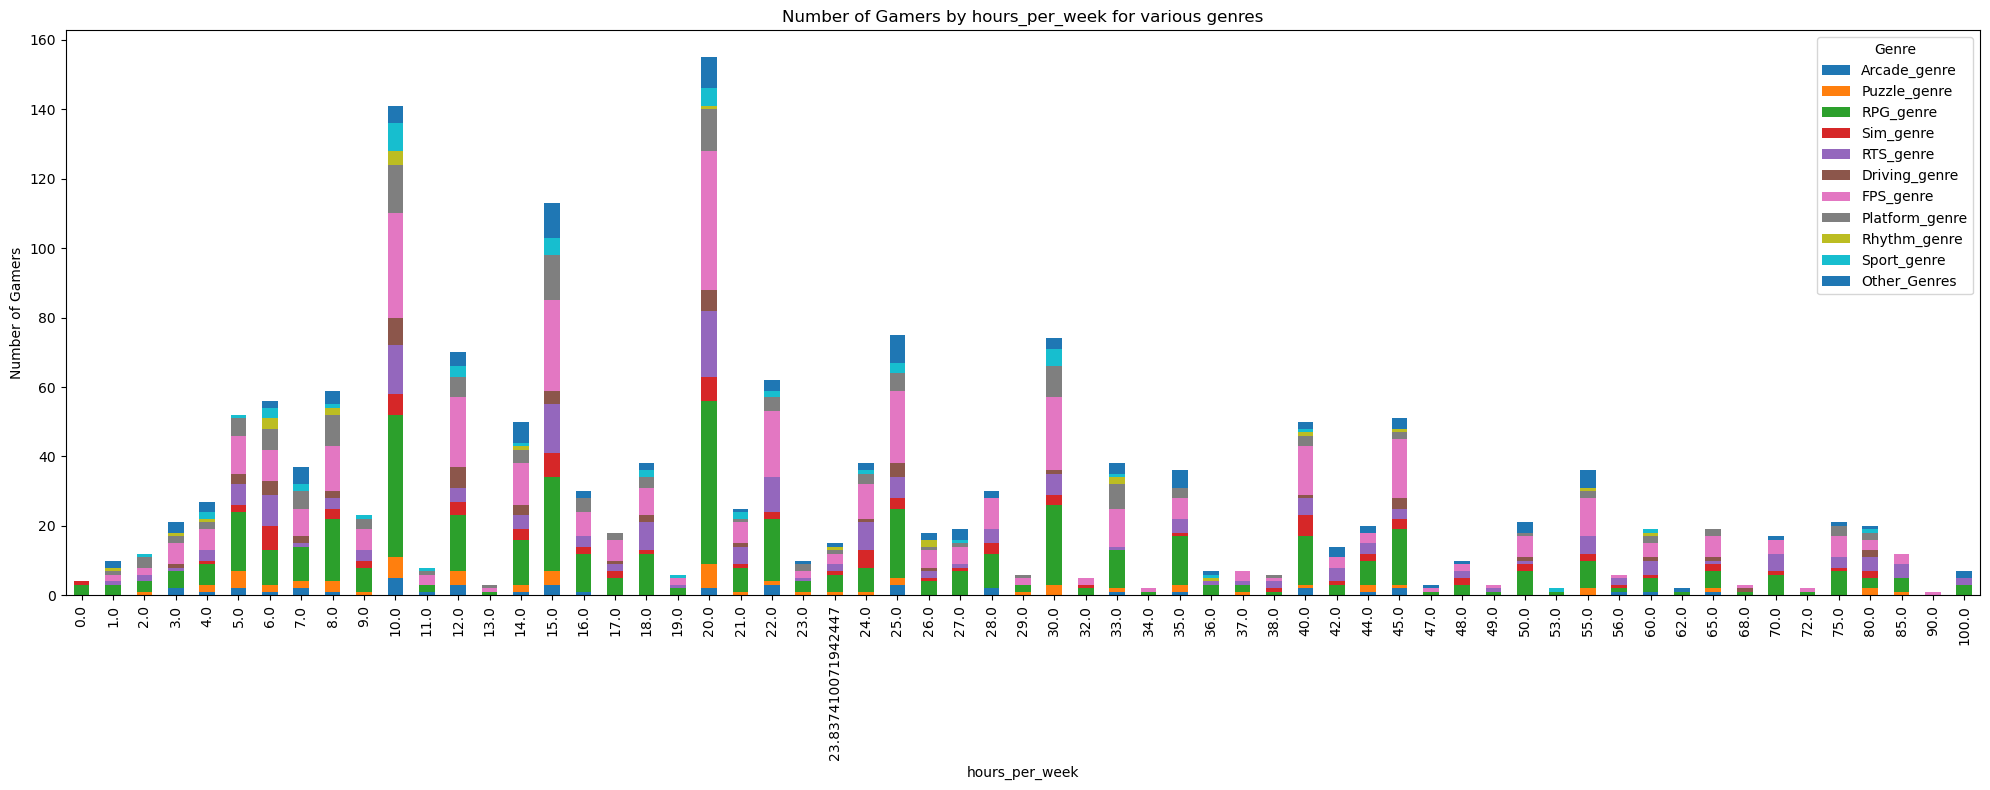

In [38]:
import matplotlib.pyplot as plt

df1 = data_frame1.copy()

# Convert columns in genre_columns to numeric (assuming 'Yes' and 'No' values)
for column in genre_columns:
    df1[column] = df1[column].replace({'Yes': 1, 'No': 0}).astype(int)

# Convert 'Percentage_Addiction_probability' to numeric if needed
df1['hours_per_week'] = pd.to_numeric(df1['hours_per_week'], errors='coerce')


# # Assuming 'Percentage_Addiction_probability' and genre_columns are in your DataFrame
# genre_columns = ['Arcade_genre', 'Puzzle_genre', 'RPG_genre', 'Sim_genre', 'RTS_genre', 'Driving_genre',
#                  'FPS_genre', 'Platform_genre', 'Rhythm_genre', 'Sport_genre']

# Group by 'Percentage_Addiction_probability' and sum the counts for each genre
genre_counts = df1.groupby('hours_per_week')[genre_columns].sum()

# Plotting the count of 'Yes' for each genre against 'Percentage_Addiction_probability'
genre_counts.plot(kind='bar', stacked=True, figsize=(20, 8))
plt.xlabel('hours_per_week')
plt.ylabel('Number of Gamers')
plt.title('Number of Gamers by hours_per_week for various genres')
plt.legend(title='Genre')
plt.tight_layout()
plt.show()

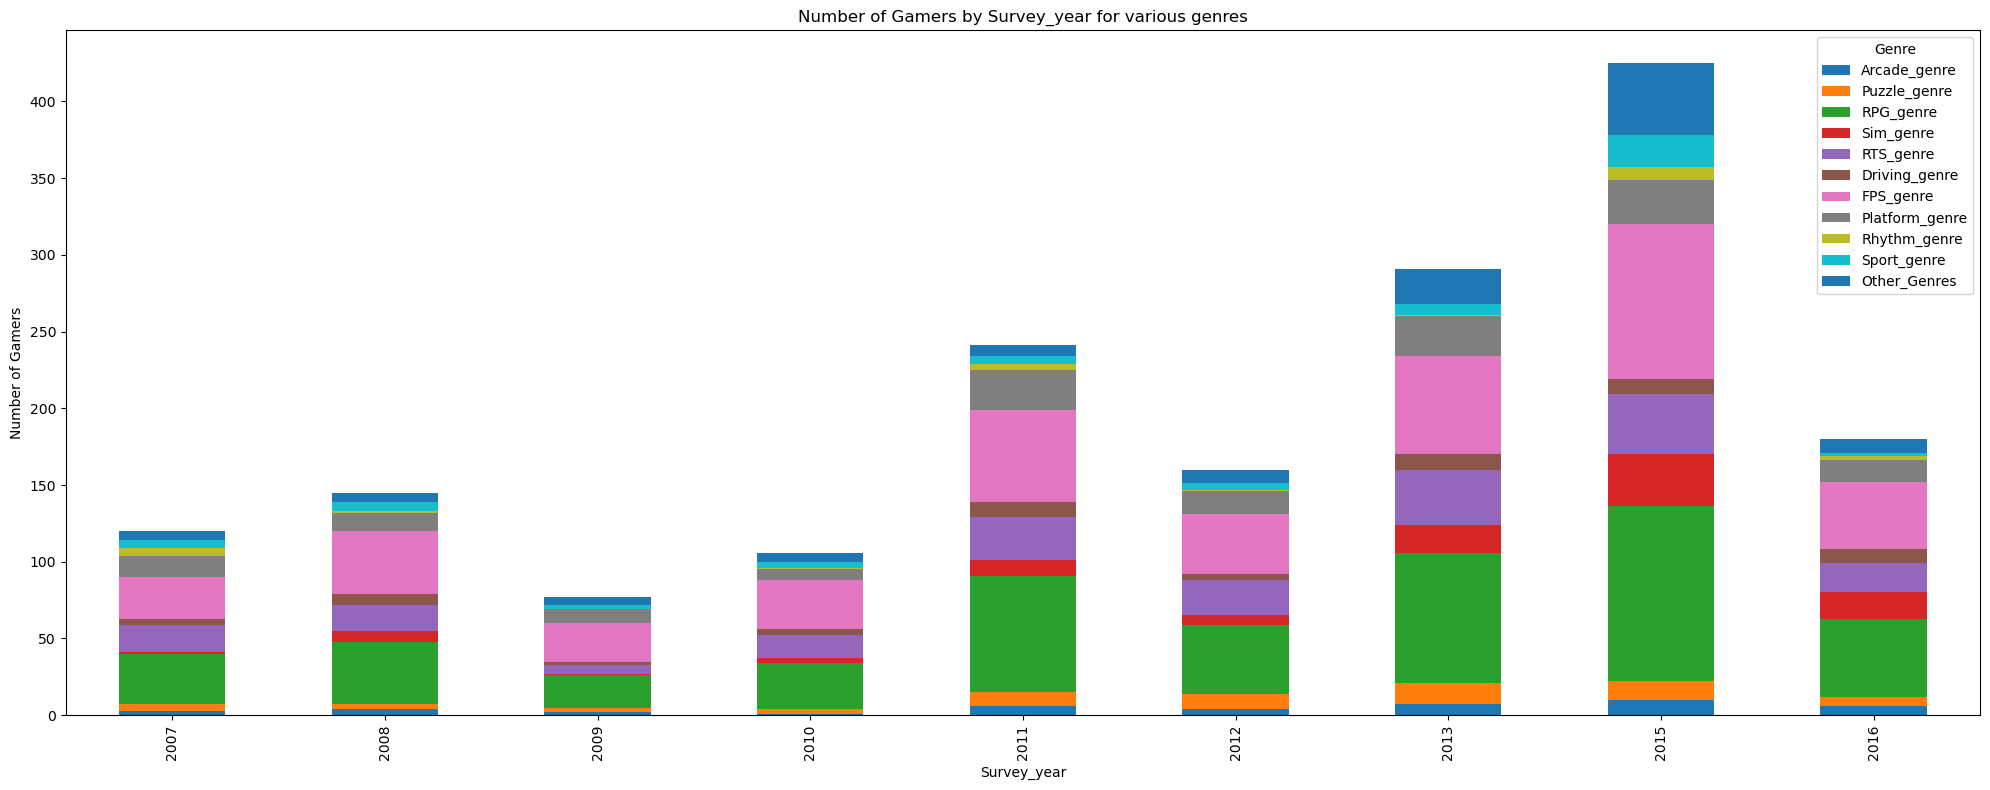

In [39]:
import matplotlib.pyplot as plt

df2 = data_frame1.copy()

# Convert columns in genre_columns to numeric (assuming 'Yes' and 'No' values)
for column in genre_columns:
    df2[column] = df2[column].replace({'Yes': 1, 'No': 0}).astype(int)

# Convert 'Percentage_Addiction_probability' to numeric if needed
df2['Survey_year'] = pd.to_numeric(df2['Survey_year'], errors='coerce')


# # Assuming 'Percentage_Addiction_probability' and genre_columns are in your DataFrame
# genre_columns = ['Arcade_genre', 'Puzzle_genre', 'RPG_genre', 'Sim_genre', 'RTS_genre', 'Driving_genre',
#                  'FPS_genre', 'Platform_genre', 'Rhythm_genre', 'Sport_genre']

# Group by 'Percentage_Addiction_probability' and sum the counts for each genre
genre_counts = df2.groupby('Survey_year')[genre_columns].sum()

# Plotting the count of 'Yes' for each genre against 'Percentage_Addiction_probability'
genre_counts.plot(kind='bar', stacked=True, figsize=(20, 8))
plt.xlabel('Survey_year')
plt.ylabel('Number of Gamers')
plt.title('Number of Gamers by Survey_year for various genres')
plt.legend(title='Genre')
plt.tight_layout()
plt.show()


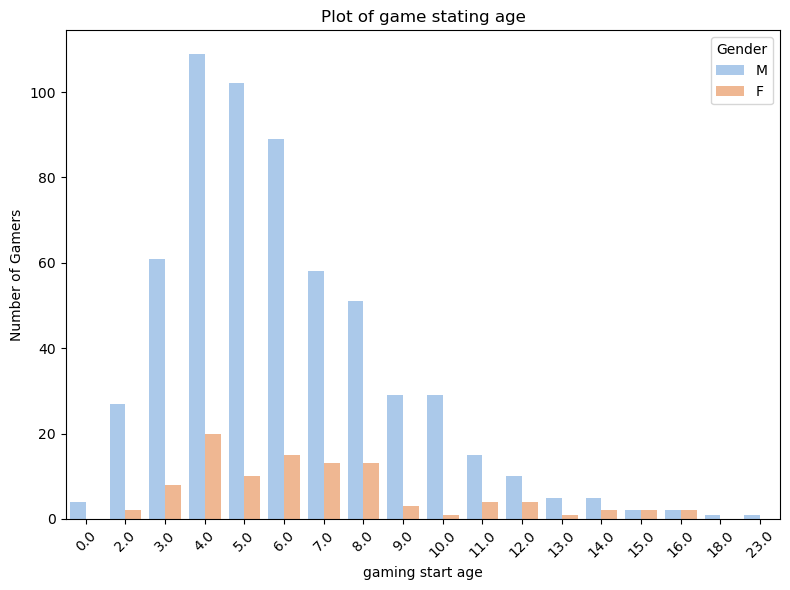

In [40]:
# Plotting the count of occurrences
plt.figure(figsize=(8, 6))
sns.countplot(x='gaming_start_age', hue='Gender', data=data_frame1, palette='pastel')
#word_counts.plot(kind='bar', color='skyblue')
plt.title('Plot of game stating age')
plt.xlabel('gaming start age')
plt.ylabel('Number of Gamers')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot or save it to a file
plt.show()  # Show the plot
# plt.savefig('string_occurrences_plot.png')  # Save the plot to a file (uncomment to save)


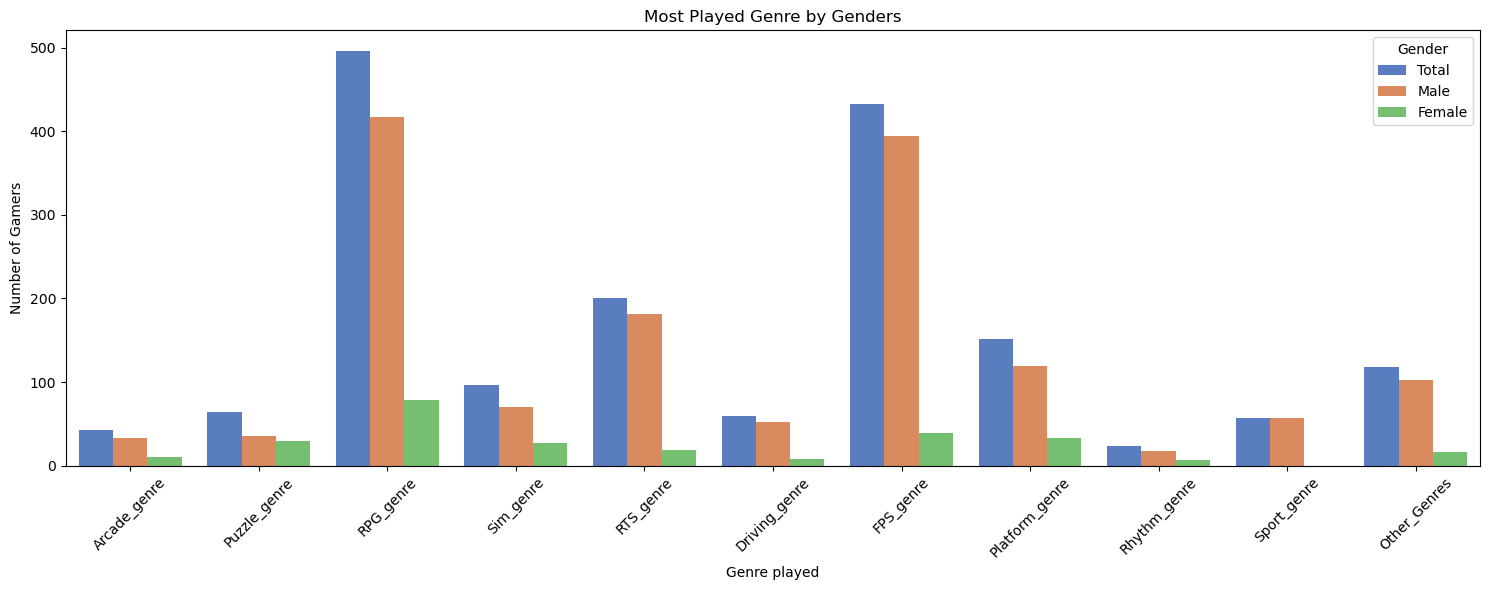

In [41]:
# Specific word to count
word_to_count = 'Yes'

# Dictionary to store word counts for specified columns
word_counts = {}

# List to store plot data
plot_data = []

# Count occurrences of the specific word in specified columns based on 'Gender'
for column in genre_columns:
    if column in data_frame1.columns and data_frame1[column].dtype == 'object':  # Check if column exists and contains strings
        word_counts[column] = data_frame1[column].str.contains(word_to_count).sum()
    male_count = data_frame1[data_frame1['Gender'] == 'M'][column].str.count(word_to_count).sum()
    female_count = data_frame1[data_frame1['Gender'] == 'F'][column].str.count(word_to_count).sum()
    
    plot_data.append({'Column': column, 'Count': male_count + female_count, 'Gender': 'Total'})
    plot_data.append({'Column': column, 'Count': male_count, 'Gender': 'Male'})
    plot_data.append({'Column': column, 'Count': female_count, 'Gender': 'Female'})

# Create a DataFrame from plot_data for plotting
plot_df = pd.DataFrame(plot_data)

# Create a bar plot with 'Gender' as hue
plt.figure(figsize=(15, 6))
sns.barplot(x='Column', y='Count', hue='Gender', data=plot_df, palette='muted')
plt.title('Most Played Genre by Genders')
plt.xlabel('Genre played')
plt.ylabel('Number of Gamers')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()

# Show the plot or save it to a file
plt.show()  # Show the plot
# plt.savefig('word_count_specific_columns_with_gender_hue.png')  # Save the plot to a file (uncomment to save)


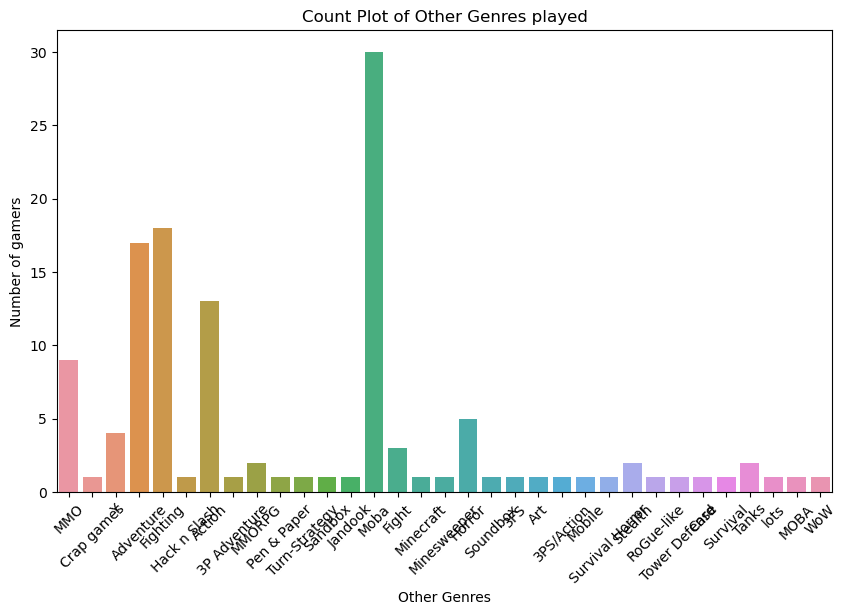

In [42]:
# Calculating value counts for Other_Genres column
word_counts = data_frame['Other_Genres'].value_counts()

# Plotting the count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=data_frame, x='Other_Genres')
plt.title('Count Plot of Other Genres played')
plt.xlabel('Other Genres')
plt.ylabel('Number of gamers')
plt.xticks(rotation=45)  # Rotate x-labels for better readability if needed
plt.show()

In [43]:
#Scatter matrix for checking outlier

plt.figure(figsize=(20,10))
attributes = ['Gender', 'Years', 'Age','hours_per_week', 'Year_interval','gaming_start_age']
#scatter_matrix(data[attributes], figsize=(20,10))
plt.show()

<Figure size 2000x1000 with 0 Axes>

C:\Users\Nedu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


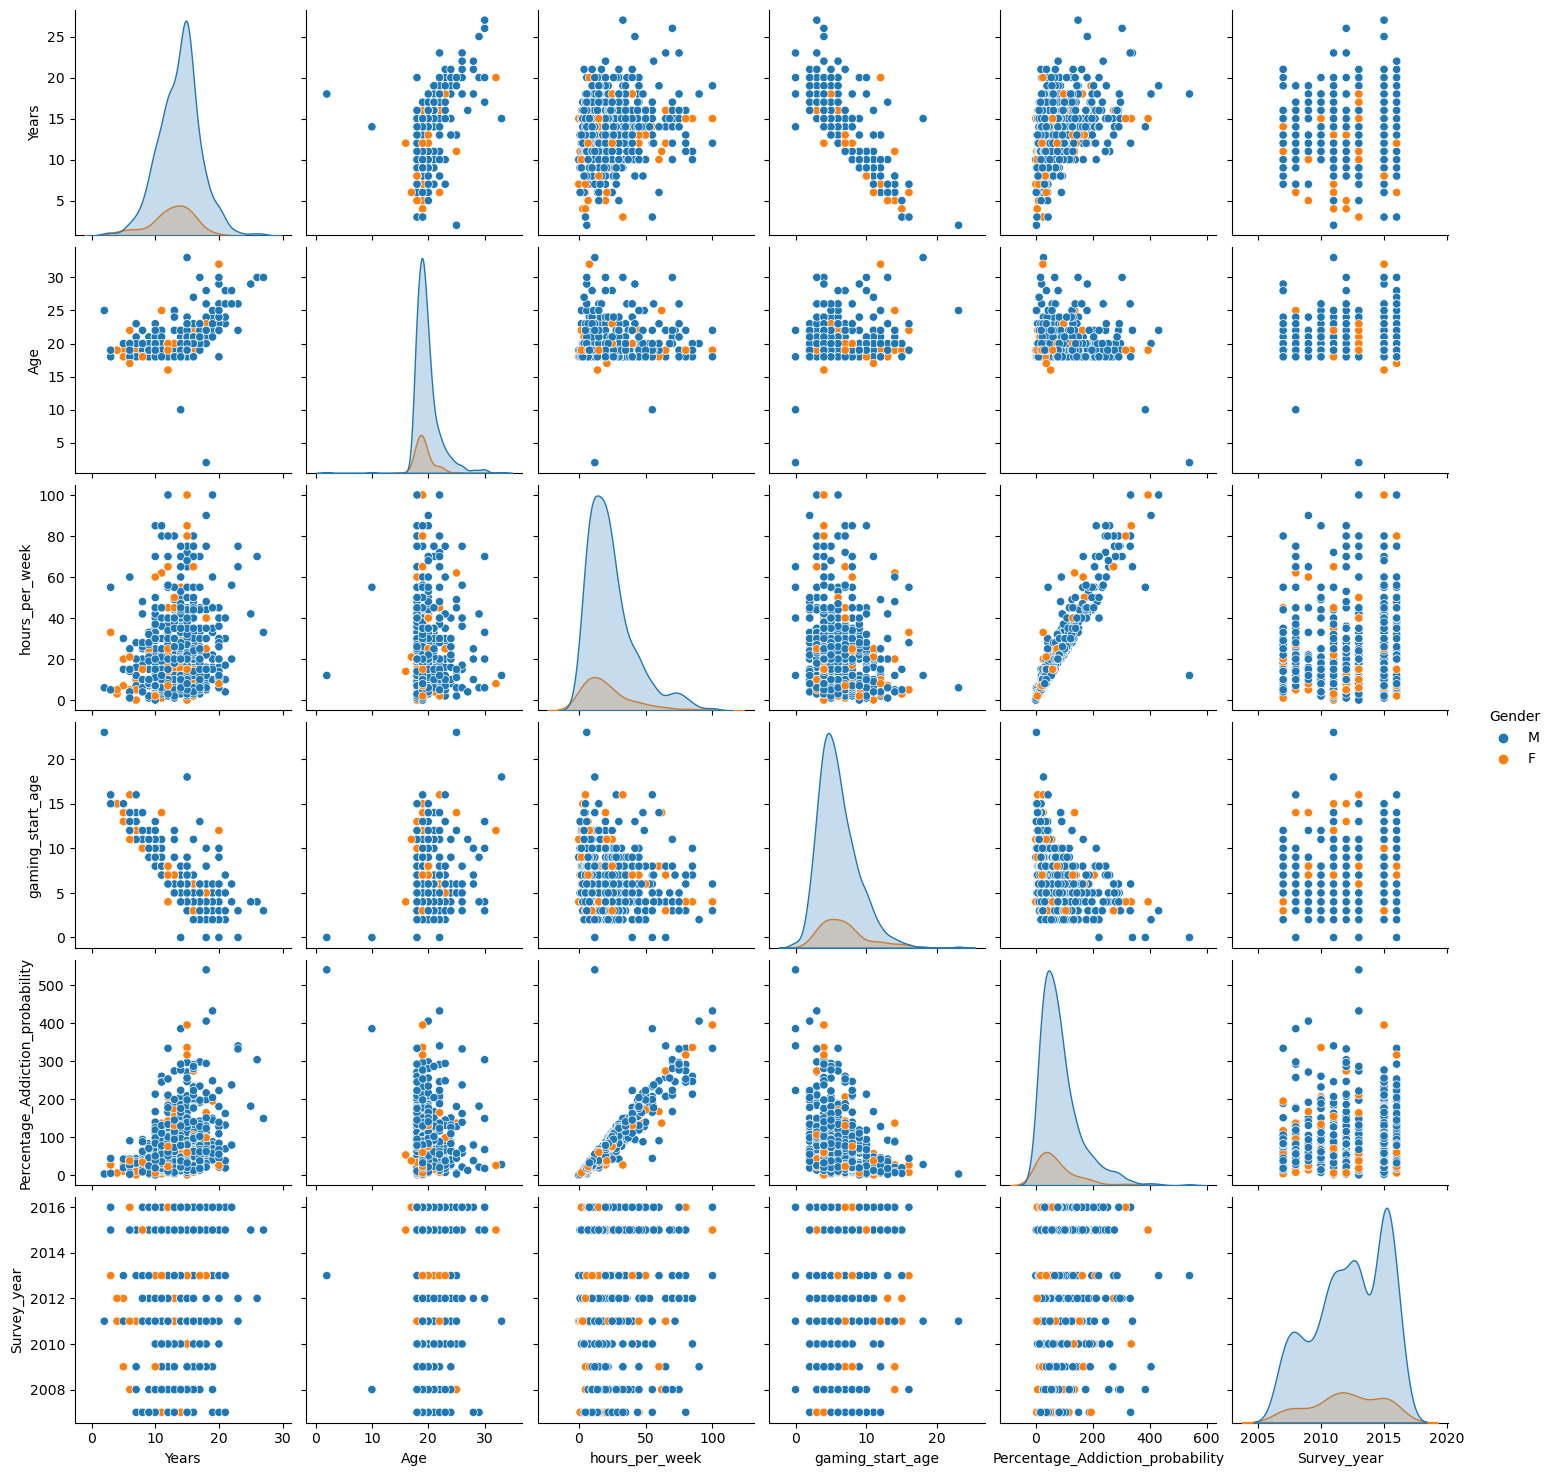

In [44]:
#Analysis Of all features and distinguishing by gender 
sns.pairplot(data_frame1,hue="Gender")

In [45]:
# #Gender & Sucide Count grouped by Age Group bar plot

# plt.figure(figsize=(7,7))
# sns.barplot(x="Gender", y="Years", hue="Age", data=data_frame1)
# plt.title('Gender & Sucide Count grouped by Age Group')
# plt.show()

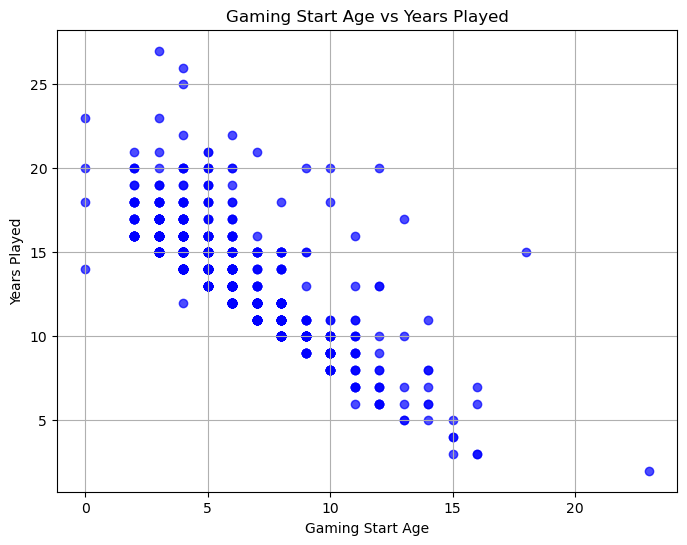

In [46]:
# Extracting data from the DataFrame columns
gaming_start_age = data_frame1['gaming_start_age']
years_played = data_frame1['Years']

# Plotting the data
plt.figure(figsize=(8, 6))
plt.scatter(gaming_start_age, years_played, color='blue', alpha=0.7)
plt.title('Gaming Start Age vs Years Played')
plt.xlabel('Gaming Start Age')
plt.ylabel('Years Played')
plt.grid(True)
plt.show()


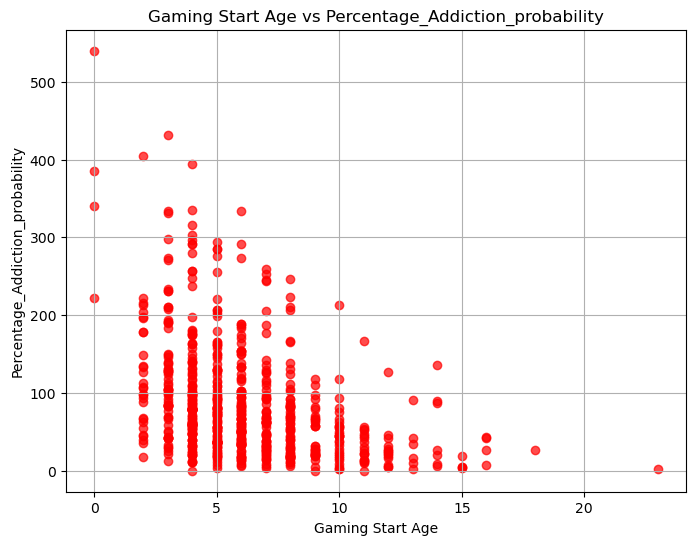

In [47]:
# Extracting data from the DataFrame columns
gaming_start_age = data_frame1['gaming_start_age']
years_played = data_frame1['Percentage_Addiction_probability']

# Plotting the data
plt.figure(figsize=(8, 6))
plt.scatter(gaming_start_age, years_played, color='red', alpha=0.7)
plt.title('Gaming Start Age vs Percentage_Addiction_probability')
plt.xlabel('Gaming Start Age')
plt.ylabel('Percentage_Addiction_probability')
plt.grid(True)
plt.show()


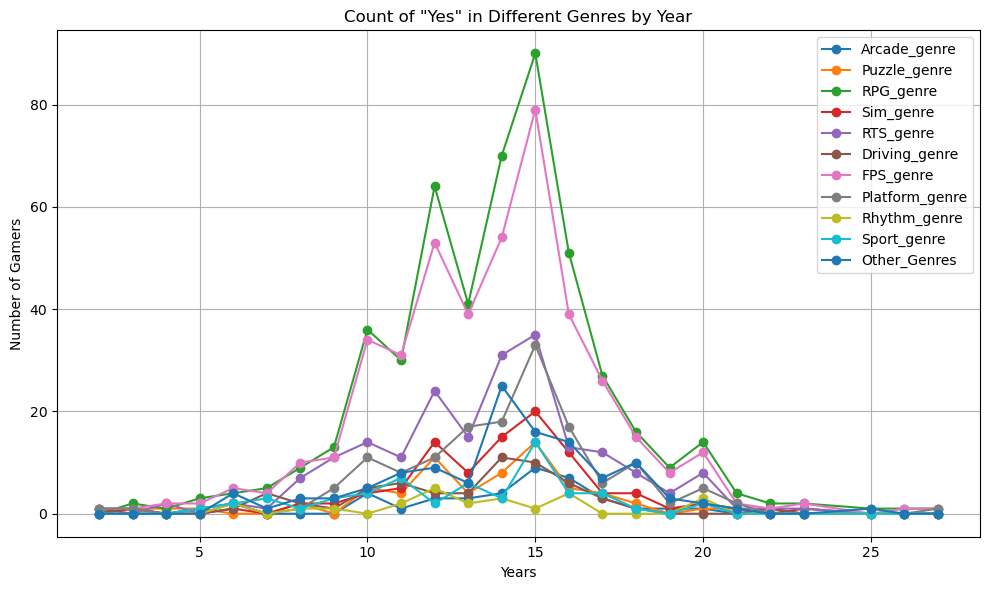

In [48]:
# Filtering the DataFrame for 'yes' values in specified columns and grouping by 'Years'
yes_counts = data_frame1[genre_columns].applymap(lambda x: 1 if x == 'Yes' else 0)
yes_counts['Years'] = data_frame1['Years']
yes_counts = yes_counts.groupby('Years').sum()

# Plotting the counts of 'yes' occurrences for each year
plt.figure(figsize=(10, 6))
for column in yes_counts.columns:
    plt.plot(yes_counts.index, yes_counts[column], marker='o', label=column)

plt.xlabel('Years')
plt.ylabel('Number of Gamers')
plt.title('Count of "Yes" in Different Genres by Year')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


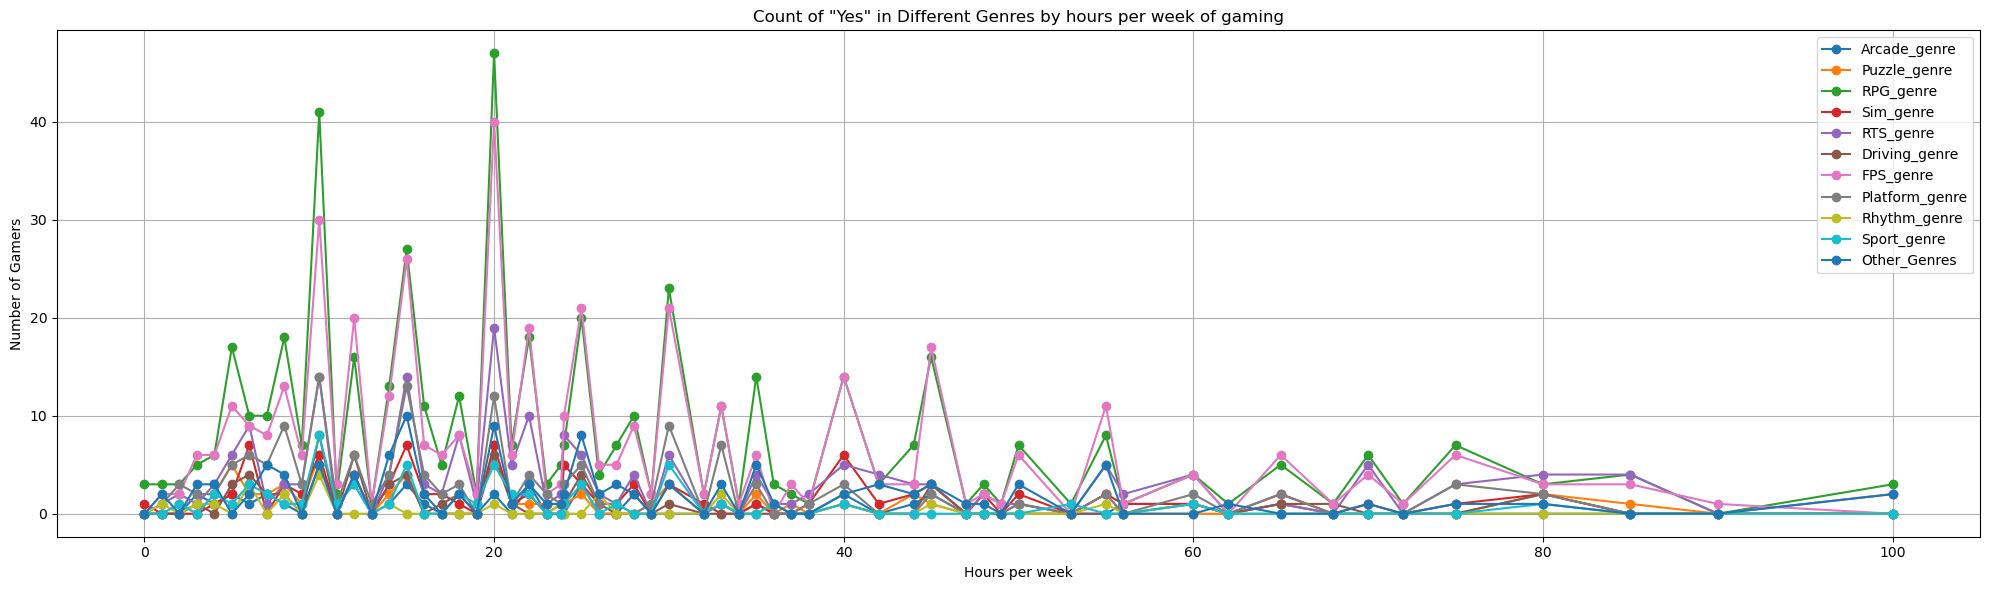

In [49]:
# Filtering the DataFrame for 'yes' values in specified columns and grouping by 'Years'
yes_counts = data_frame1[genre_columns].applymap(lambda x: 1 if x == 'Yes' else 0)
yes_counts['hours_per_week'] = data_frame1['hours_per_week']
yes_counts = yes_counts.groupby('hours_per_week').sum()

# Plotting the counts of 'yes' occurrences for each year
plt.figure(figsize=(20, 6))
for column in yes_counts.columns:
    plt.plot(yes_counts.index, yes_counts[column], marker='o', label=column)

plt.xlabel('Hours per week')
plt.ylabel('Number of Gamers')
plt.title('Count of "Yes" in Different Genres by hours per week of gaming')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<Axes: xlabel='Survey_year'>

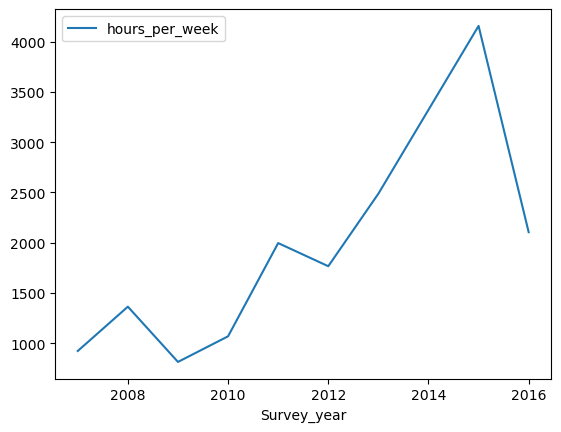

In [50]:
#Line plpot of year and suicide_rate

data_frame1[['Survey_year','hours_per_week']].groupby(['Survey_year']).sum().plot()

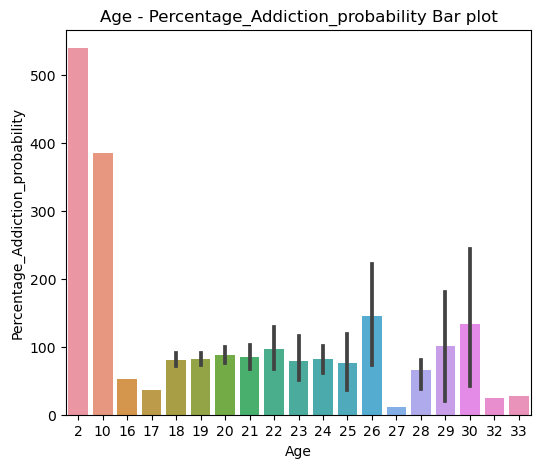

In [51]:
#Country & Suicide_rate Bar plot

plt.figure(figsize=(6,5))
sns.barplot(x = "Age", y = "Percentage_Addiction_probability", data = data_frame1)
plt.title('Age - Percentage_Addiction_probability Bar plot')
plt.show()

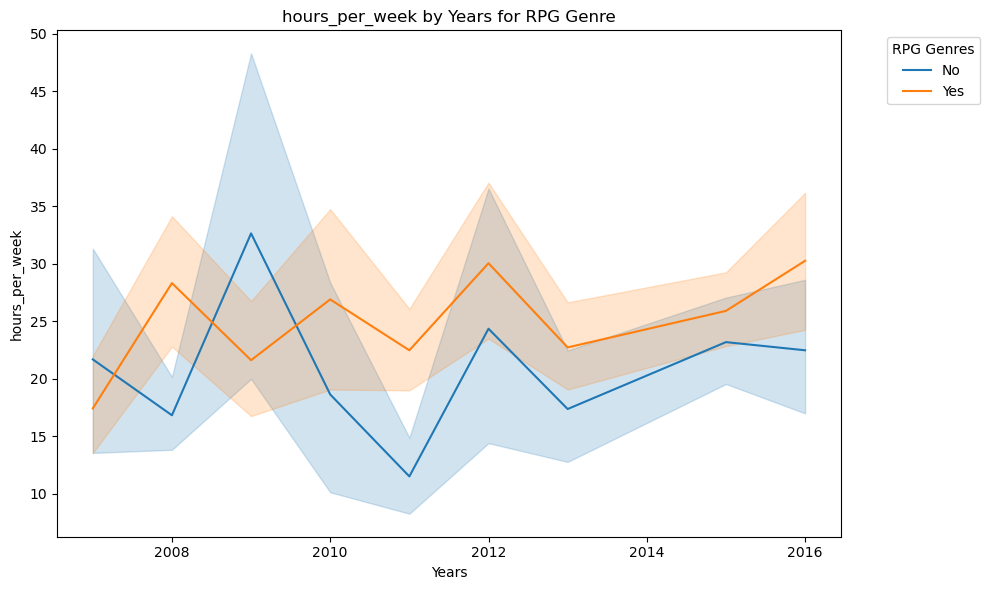

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df8 is your DataFrame with 'Percentage_Addiction_probability', 'years', and 'genres' columns

# Using seaborn lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_frame1, x='Survey_year', y='hours_per_week', hue='RPG_genre')
plt.title('hours_per_week by Years for RPG Genre')
plt.xlabel('Years')
plt.ylabel('hours_per_week')
plt.legend(title='RPG Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## 4. Data Preprocessing & EDA:
Here, we clean the data by applying data preprocesssing techniques and transform the data to use it in the models.

In [53]:
#encoding the categorical features with LabelEncoder

from sklearn.preprocessing import LabelEncoder
import pickle
file = open('pickle/label.pkl', 'wb')
categorical = ['Gender','Arcade_genre', 'Puzzle_genre','RPG_genre', 'Sim_genre', 'RTS_genre', 'Driving_genre', 'FPS_genre',
               'Platform_genre', 'Rhythm_genre', 'Sport_genre','Other_Genres']
dict= {}

#create dataframe for encoding
data_frame2 = data_frame1.copy()

for column in categorical:
    le = LabelEncoder()
    le.fit(data_frame2[column])
    # dump information to that file
    dict[column] = le
    data_frame2[column] = le.transform(data_frame2[column])
pickle.dump(dict, file)
file.close()

In [54]:
data_frame2.describe()

# checking info of data set
data_frame2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 97 to 743
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Gender                            700 non-null    int32  
 1   Years                             700 non-null    float64
 2   Age                               700 non-null    int32  
 3   hours_per_week                    700 non-null    float64
 4   Arcade_genre                      700 non-null    int32  
 5   Puzzle_genre                      700 non-null    int32  
 6   RPG_genre                         700 non-null    int32  
 7   Sim_genre                         700 non-null    int32  
 8   RTS_genre                         700 non-null    int32  
 9   Driving_genre                     700 non-null    int32  
 10  FPS_genre                         700 non-null    int32  
 11  Platform_genre                    700 non-null    int32  
 12  Rhythm_genre

In [55]:
#opening pickled file

file = open('pickle/label.pkl', "rb")
label = pickle.load(file)
label

{'Gender': LabelEncoder(),
 'Arcade_genre': LabelEncoder(),
 'Puzzle_genre': LabelEncoder(),
 'RPG_genre': LabelEncoder(),
 'Sim_genre': LabelEncoder(),
 'RTS_genre': LabelEncoder(),
 'Driving_genre': LabelEncoder(),
 'FPS_genre': LabelEncoder(),
 'Platform_genre': LabelEncoder(),
 'Rhythm_genre': LabelEncoder(),
 'Sport_genre': LabelEncoder(),
 'Other_Genres': LabelEncoder()}

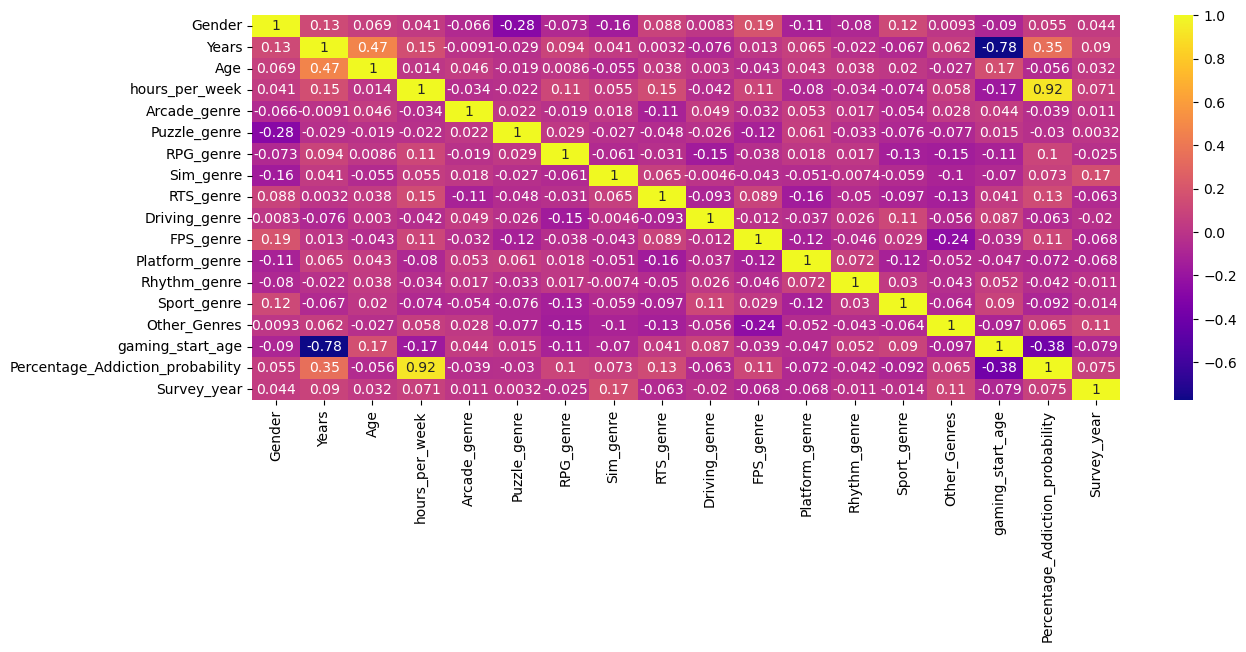

In [56]:
from sklearn.preprocessing import LabelEncoder

# # Assuming 'Gender' is a categorical column with 'M' and 'F' values
# label_encoder = LabelEncoder()
# data_frame2['Gender'] = label_encoder.fit_transform(data_frame2['Gender'])

# # Replace 'Problem_Column' with the column name causing the error
# label_encoder = LabelEncoder()
# data_frame2['Gender'] = label_encoder.fit_transform(data_frame2['Gender'].astype(str))

# checking the data types and generate the correlation heatmap
plt.figure(figsize=(14, 5))
sns.heatmap(data_frame2.corr(), annot=True, cmap='plasma')
plt.show()

In [57]:
#Scaling the numerical data columns with RobustScalar

numerical = ['Years', 'Age','hours_per_week','gaming_start_age','Percentage_Addiction_probability']

from sklearn.preprocessing import RobustScaler

rc = RobustScaler()
data_frame2[numerical] = rc.fit_transform(data_frame2[numerical])


In [58]:
import pickle
pickle.dump(rc, open('pickle/robust.pkl', "wb"))

In [59]:
# Seperating & assigning features and target columns to X & y

y = data_frame2['gaming_start_age']
X = data_frame2.drop('gaming_start_age',axis=1)
X.shape, y.shape

((700, 17), (700,))

In [60]:
data_frame2

,Gender,Years,Age,hours_per_week,Arcade_genre,Puzzle_genre,RPG_genre,Sim_genre,RTS_genre,Driving_genre,FPS_genre,Platform_genre,Rhythm_genre,Sport_genre,Other_Genres,gaming_start_age,Percentage_Addiction_probability,Survey_year
97,1,0.000000,0.5,0.10,0,0,0,0,1,0,1,1,0,0,0,0.00,0.141566,2007
113,0,-2.000000,0.5,-0.60,0,0,1,0,0,0,0,0,0,0,1,1.50,-0.680177,2007
112,1,2.333333,2.0,-0.80,0,1,1,0,0,0,0,1,0,0,0,-1.00,-0.649721,2007
111,1,-2.000000,-0.5,0.00,0,0,1,0,1,0,1,0,0,0,0,1.00,-0.296997,2007
110,1,-0.333333,0.0,1.75,0,0,1,0,1,0,1,0,0,0,0,0.00,1.638996,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689,0,-0.666667,0.0,-0.65,0,1,1,0,0,1,0,0,0,0,0,0.25,-0.597932,2016
688,1,0.333333,0.0,-0.60,0,0,1,0,0,0,0,1,0,0,0,-0.50,-0.470310,2016
687,1,-0.333333,-0.5,1.00,0,0,1,1,0,0,1,0,0,0,0,-0.25,1.050123,2016
694,1,0.000000,-0.5,0.00,0,0,1,0,0,1,0,1,0,0,0,-0.50,0.152043,2016


## 5. Splitting the Data:
The data is split into train & test sets, 80-20 split.

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape

((560, 17), (140, 17))

In [62]:
# from sklearn.impute import SimpleImputer

# # Replace missing values with mean of the column
# imputer = SimpleImputer(strategy='mean')
# X_train_imputed = imputer.fit_transform(X_train)

## 6. Model Building & Training:
   One of the most popular and effective forms of machine learning is supervised learning. When we have examples of feature-label pairs, we can use supervised learning to predict a specific outcome or label from a given set of features. Our training set consists of these feature-label pairs, from which we construct a machine learning model. Making precise predictions for fresh, never-before-seen data is our aim.

   Classification and regression are the two main categories of supervised machine learning problems. Given that the suicide rate prediction is a continuous number—or, in programming parlance, a floating-point number—our data set falls under the category of regression problems. The supervised machine learning models (regression) considered to train the dataset in this notebook are:


1. Linear Regression
2. Decision Tree
3. Random Forest
4. Gradient Boosting
5. k-Nearest Neighbors Regression
6. Bagging Regression
7. Support Vector Regression
8. Multilayer Perceptrons
              
  The metrics considered to evaluate the model performance are Accuracy & Root Mean Squared Error.

In [63]:
#importing required libraries 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [64]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []
rmse_train = []
rmse_test = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))
  rmse_train.append(round(c, 3))
  rmse_test.append(round(d, 3))

## 6.1. Linear Regression
   Linear regression, or ordinary least squares (OLS), is the simplest and most classic linear method for regression. Linear regression finds the parameters w and b that minimize the mean squared error between predictions and the true regression targets, y, on the training set.

In [65]:
# Linear regression model 
from sklearn.linear_model import LinearRegression

# instantiate the model
lr = LinearRegression()
# fit the model
lr.fit(X_train, y_train)

LinearRegression()

In [66]:
#predicting the target value from the model for the samples
y_test_lr = lr.predict(X_test)
y_train_lr = lr.predict(X_train)

In [67]:
#computing the accuracy of the model performance
acc_train_lr = lr.score(X_train, y_train)
acc_test_lr = lr.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_lr = np.sqrt(mean_squared_error(y_train, y_train_lr))
rmse_test_lr = np.sqrt(mean_squared_error(y_test, y_test_lr))

print("Linear Regression: Accuracy on training Data: {:.3f}".format(acc_train_lr))
print("Linear Regression: Accuracy on test Data: {:.3f}".format(acc_test_lr))
print('\nLinear Regression: The RMSE of the training set is:', rmse_train_lr)
print('Linear Regression: The RMSE of the testing set is:', rmse_test_lr)

Linear Regression: Accuracy on training Data: 0.984
Linear Regression: Accuracy on test Data: 0.984

Linear Regression: The RMSE of the training set is: 0.09432629914210038
Linear Regression: The RMSE of the testing set is: 0.0812576714920231


In [68]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Linear Regression', acc_train_lr, acc_test_lr, rmse_train_lr, rmse_test_lr)

Text(0.5, 1.0, 'Actual vs Predicted Training Set')

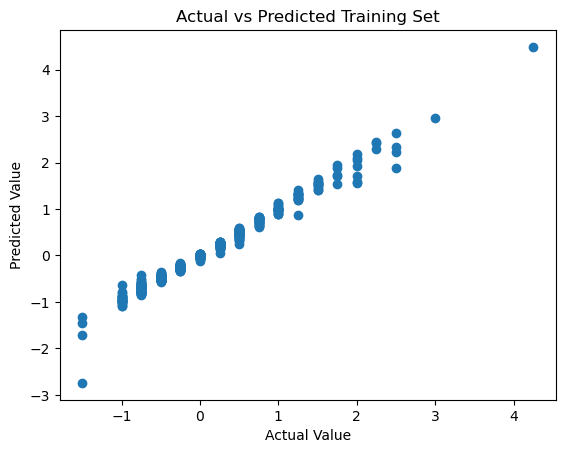

In [69]:
plt.scatter(y_train,y_train_lr)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Actual vs Predicted Training Set")

Text(0.5, 1.0, 'Actual vs Predicted Testing Set')

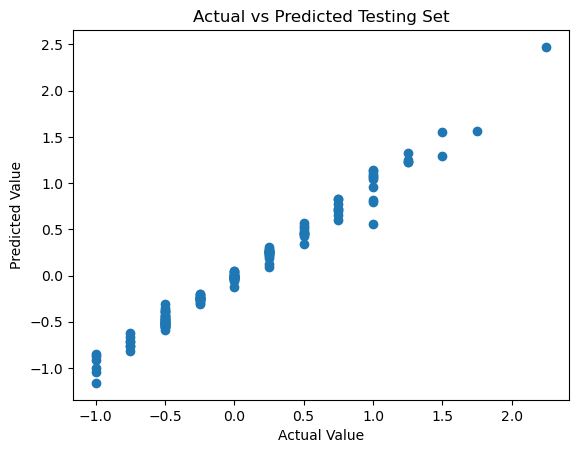

In [70]:
plt.scatter(y_test,y_test_lr)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Actual vs Predicted Testing Set")

## 6.2. Decision Trees: Regression
   Decision trees are widely used models for classification and regression tasks. Essentially, they learn a hierarchy of if/else questions, leading to a decision. Learning a decision tree means learning the sequence of if/else questions that gets us to the true answer most quickly.

  In the machine learning setting, these questions are called tests (not to be confused with the test set, which is the data we use to test to see how generalizable our model is). To build a tree, the algorithm searches over all possible tests and finds the one that is most informative about the target variable.

In [71]:
# Decision Tree regression model 
from sklearn.tree import DecisionTreeRegressor

# instantiate the model 
tree = DecisionTreeRegressor(max_depth=9)
# fit the model 
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=9)

In [72]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

In [73]:
#computing the accuracy of the model performance
acc_train_tree = tree.score(X_train, y_train)
acc_test_tree = tree.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_tree = np.sqrt(mean_squared_error(y_train, y_train_tree))
rmse_test_tree = np.sqrt(mean_squared_error(y_test, y_test_tree))

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))
print('\nDecision Tree: The RMSE of the training set is:', rmse_train_tree)
print('Decision Tree: The RMSE of the testing set is:', rmse_test_tree)

Decision Tree: Accuracy on training Data: 0.998
Decision Tree: Accuracy on test Data: 0.914

Decision Tree: The RMSE of the training set is: 0.03530268774335407
Decision Tree: The RMSE of the testing set is: 0.18541867307635665


# Storing Results

In [74]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree',acc_train_tree, acc_test_tree, rmse_train_tree, rmse_test_tree)

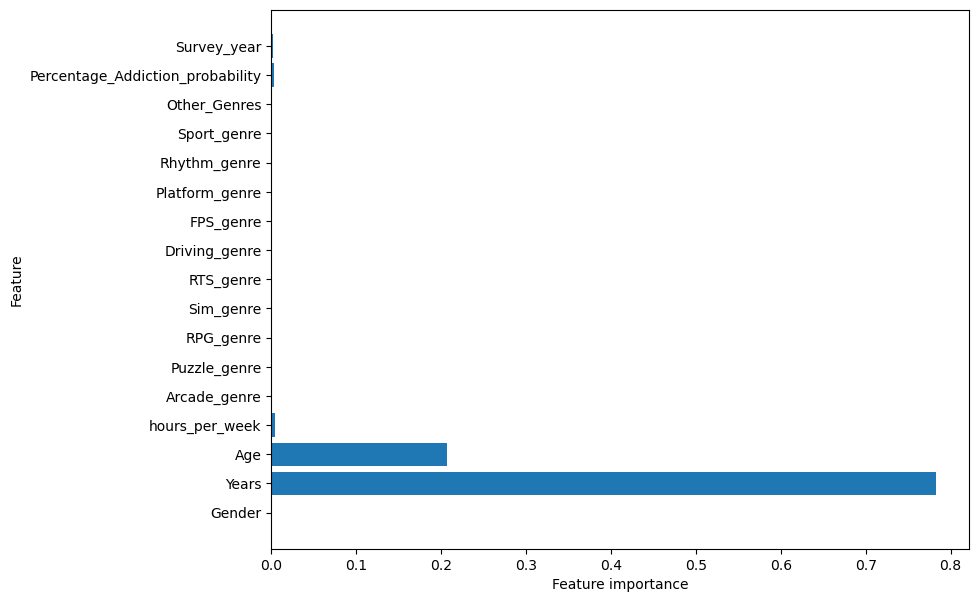

In [75]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

# Evaluating training and testing set performance with different numbers of max_depth from 1 to 30. The plot shows the training and test set accuracy on the y-axis against the setting of max_depth on the x-axis.

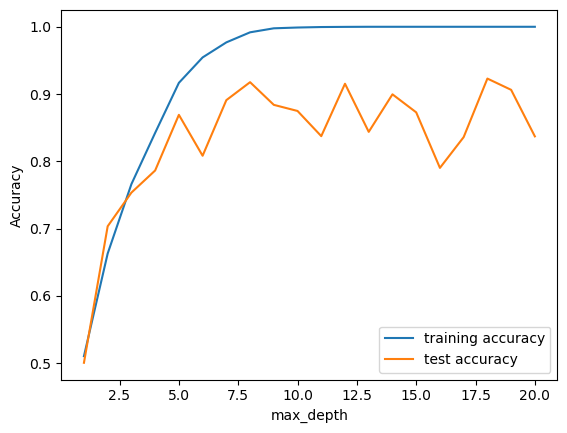

In [76]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1, 21)
for n in depth:
  # fit the model
  tree = DecisionTreeRegressor(max_depth=n)
  tree.fit(X_train, y_train)
  # record training set accuracy
  training_accuracy.append(tree.score(X_train, y_train))
  # record generalization accuracy
  test_accuracy.append(tree.score(X_test, y_test))

#plotting the training & testing accuracy for max_depth from 1 to 20
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend()

#### OBSERVATIONS:


## 6.3. Random Forest: Ensemble of Decision Trees
Random forests for regression and classification are currently among the most widely used machine learning methods.A random forest is essentially a collection of decision trees, where each tree is slightly different from the others. The idea behind random forests is that each tree might do a relatively good job of predicting, but will likely overfit on part of the data.

   If we build many trees, all of which work well and overfit in different ways, we can reduce the amount of overfitting by averaging their results. To build a random forest model, you need to decide on the number of trees to build (the n_estimators parameter of RandomForestRegressor or RandomForestClassifier). They are very powerful, often work well without heavy tuning of the parameters, and don’t require scaling of the data.

In [77]:
# Random Forest regression model
from sklearn.ensemble import RandomForestRegressor

# instantiate the model
forest = RandomForestRegressor(max_depth=9)

# fit the model 
forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=9)

In [78]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

In [79]:
#computing the accuracy of the model performance
acc_train_forest = forest.score(X_train, y_train)
acc_test_forest = forest.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_forest = np.sqrt(mean_squared_error(y_train, y_train_forest))
rmse_test_forest = np.sqrt(mean_squared_error(y_test, y_test_forest))

print("Random Forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))
print('\nRandom Forest: The RMSE of the training set is: ', rmse_train_forest)
print('Random Forest: The RMSE of the testing set is: ', rmse_test_forest)

Random Forest: Accuracy on training Data: 0.991
Random Forest: Accuracy on test Data: 0.946

Random Forest: The RMSE of the training set is:  0.07142812399683703
Random Forest: The RMSE of the testing set is:  0.14698059983937253


#### Storing Results:

In [80]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random Forest',acc_train_forest, acc_test_forest, rmse_train_forest, rmse_test_forest)

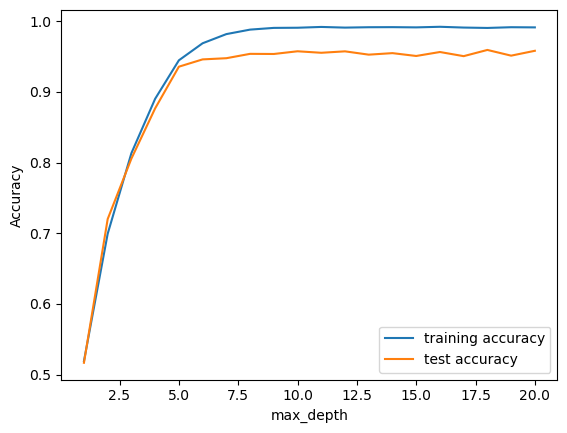

In [81]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1, 21)
for n in depth:
  # fit the model
  forest = RandomForestRegressor(max_depth=n)
  forest.fit(X_train, y_train)
  # record training set accuracy
  training_accuracy.append(forest.score(X_train, y_train))
  # record generalization accuracy
  test_accuracy.append(forest.score(X_test, y_test))

#plotting the training & testing accuracy for max_depth from 1 to 20
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend()

## 6.4. Gradient Boosted Regression Trees (gradient boosting machines): Ensemble of Decision Trees
   The gradient boosted regression tree is another ensemble method that combines multiple decision trees to create a more powerful model. Despite the “regression” in the name, these models can be used for regression and classification. In contrast to the random forest approach, gradient boosting works by building trees in a serial manner, where each tree tries to correct the mistakes of the previous one.

In [82]:
# Gradient Boosted Regression Trees model
from sklearn.ensemble import GradientBoostingRegressor

# instantiate the model
gbrt = GradientBoostingRegressor(learning_rate=0.5)

# fit the model 
gbrt.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.5)

In [83]:
#predicting the target value from the model for the samples
y_test_gbrt = gbrt.predict(X_test)
y_train_gbrt = gbrt.predict(X_train)

#### Performance Evaluation:

In [84]:
#computing the accuracy of the model performance
acc_train_gbrt = gbrt.score(X_train, y_train)
acc_test_gbrt = gbrt.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_gbrt = np.sqrt(mean_squared_error(y_train, y_train_gbrt))
rmse_test_gbrt = np.sqrt(mean_squared_error(y_test, y_test_gbrt))

print("Gradient Boosted Regression Trees: Accuracy on training Data: {:.3f}".format(acc_train_gbrt))
print("Gradient Boosted Regression Trees: Accuracy on test Data: {:.3f}".format(acc_test_gbrt))
print('\nGradient Boosted Regression Trees: The RMSE of the training set is: ', rmse_train_gbrt)
print('Gradient Boosted Regression Trees: The RMSE of the testing set is: ', rmse_test_gbrt)

Gradient Boosted Regression Trees: Accuracy on training Data: 1.000
Gradient Boosted Regression Trees: Accuracy on test Data: 0.981

Gradient Boosted Regression Trees: The RMSE of the training set is:  0.00734358623657159
Gradient Boosted Regression Trees: The RMSE of the testing set is:  0.08607597548345508


#### Storing Results:

In [85]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Gradient Boosted Regression',acc_train_gbrt, acc_test_gbrt, rmse_train_gbrt, rmse_test_gbrt)

Evaluating training and testing set performance with different numbers of learning_rate from 0.1 to 0.9. The plot shows the training and test set accuracy on the y-axis against the setting of learning_rate on the x-axis.

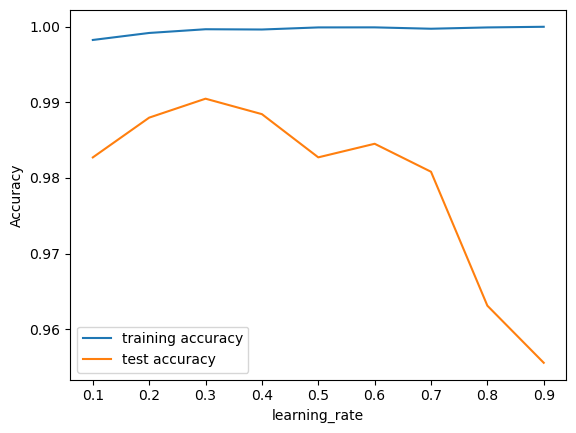

In [86]:
training_accuracy = []
test_accuracy = []
r = []
# try learning_rate from 0.1 to 0.9
rate = range(1, 10)
for n in rate:
  # fit the model
  gbrt = GradientBoostingRegressor(learning_rate=n*0.1)
  gbrt.fit(X_train, y_train)
  r.append(n*0.1)
  # record training set accuracy
  training_accuracy.append(gbrt.score(X_train, y_train))
  # record generalization accuracy
  test_accuracy.append(gbrt.score(X_test, y_test))

#plotting the training & testing accuracy for learning_rate from 0.1 to 0.9
plt.plot(r, training_accuracy, label="training accuracy")
plt.plot(r, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend()

#### OBSERVATIONS:
The model didnt overfit when trained without tuning any parameters. The model accuracy obtained is 95.5%.

Hyper tuning is performed for Gradient Boosted Regression Tree model. The tuned parameters are learning_rate, n_estimators & max_depth. Even upon changing the n_estimators with the combination of other two, there is no change in the model performance.

So, the default value of n_estimators is taken and the other two parameters are tuned. The otimized Gradient Boosted model gives us an accuracy of 98.2%, with parameter tuning.

## 6.5. k-Nearest Neighbors Regression:
 K nearest neighbors is a simple algorithm that stores all available cases and predict the numerical target based on a similarity measure (e.g., distance functions). A simple implementation of KNN regression is to calculate the average of the numerical target of the k nearest neighbors.

In [87]:
# KNN Regression model
from sklearn.neighbors import KNeighborsRegressor

# instantiate the model
knn = KNeighborsRegressor()

param_grid = {'n_neighbors':list(range(1, 31)), 'weights': ['uniform', 'distance']}

# instantiate the grid
knn_grid = GridSearchCV(knn, param_grid , cv=10)

# fit the model 
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']})

In [88]:
#Checking the best parameters for the model
knn_para = knn_grid.best_params_
print(knn_para)

{'n_neighbors': 5, 'weights': 'distance'}


In [89]:
#predicting the target value from the model for the samples
y_train_knn = knn_grid.predict(X_train)
y_test_knn = knn_grid.predict(X_test)

#### Performance Evaluation:

In [90]:
#computing the accuracy of the model performance
acc_train_knn = knn_grid.score(X_train, y_train) 
acc_test_knn = knn_grid.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_knn = np.sqrt(mean_squared_error(y_train, y_train_knn))
rmse_test_knn = np.sqrt(mean_squared_error(y_test, y_test_knn))

print("KNN: Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("KNN: Accuracy on test Data: {:.3f}".format(acc_test_knn))
print('\nKNN: The RMSE of the training set is:', rmse_train_knn)
print('KNN: The RMSE of the testing set is:', rmse_test_knn)

KNN: Accuracy on training Data: 1.000
KNN: Accuracy on test Data: 0.747

KNN: The RMSE of the training set is: 8.486958202368142e-06
KNN: The RMSE of the testing set is: 0.3181377332033993


#### Storing Results:

In [91]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('k-Nearest Neighbors Regression', acc_train_knn, acc_test_knn, rmse_train_knn, rmse_test_knn)

Evaluating training and testing set performance with different numbers of neighbors from 1 to 30. The plot shows the training and test set accuracy on the y-axis against the setting of n_neighbors on the x-axis.

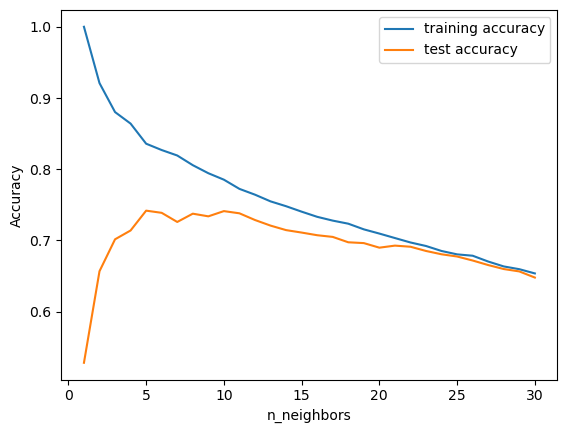

In [92]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 30
neighbors_settings = range(1, 31)
for n in neighbors_settings:
  # fit the model
  knn = KNeighborsRegressor(n_neighbors=n)
  knn.fit(X_train, y_train)
  # record training set accuracy
  training_accuracy.append(knn.score(X_train, y_train))
  # record generalization accuracy
  test_accuracy.append(knn.score(X_test, y_test))

#plotting the training & testing accuracy for n_neighbours from 1 to 30
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_neighbors")
plt.legend()

#### OBSERVATIONS:
This discrepancy between performance on the training set and the testing set for n_neighbors < 5 is a clear sign of overfitting. After that, the perfromance is not so great so, moving on to the other models.

## 6.6. Bagging Regression:
   Bagging Regressor is an ensemble estimator which fits base estimator on each random subset of the Train dataset and then aggregates their individual predictions to form a final prediction using voting or averaging method. Here the base estimator is Decision Trees.

In [93]:
#Bagging Regression model
from sklearn.ensemble import BaggingRegressor

#instantiate the model
br = BaggingRegressor(n_estimators=10)

#fit the model
br.fit(X_train, y_train)

BaggingRegressor()

In [94]:
#predicting the target value from the model for the samples
y_test_br = br.predict(X_test)
y_train_br = br.predict(X_train)

#### Performance Evaluation:

In [95]:
#computing the accuracy of the model performance
acc_train_br = br.score(X_train, y_train)
acc_test_br = br.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_br = np.sqrt(mean_squared_error(y_train, y_train_br))
rmse_test_br = np.sqrt(mean_squared_error(y_test, y_test_br))

print("Bagging Regression: Accuracy on training Data: {:.3f}".format(acc_train_br))
print("Bagging Regression: Accuracy on test Data: {:.3f}".format(acc_test_br))
print('\nBagging Regression: The RMSE of the training set is: ', rmse_train_br)
print('Bagging Regression: The RMSE of the testing set is: ', rmse_test_br)

Bagging Regression: Accuracy on training Data: 0.991
Bagging Regression: Accuracy on test Data: 0.929

Bagging Regression: The RMSE of the training set is:  0.07108062575092355
Bagging Regression: The RMSE of the testing set is:  0.16896481036848218


#### Storing Results:

In [96]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Bagging Regression',acc_train_br, acc_test_br, rmse_train_br, rmse_test_br)


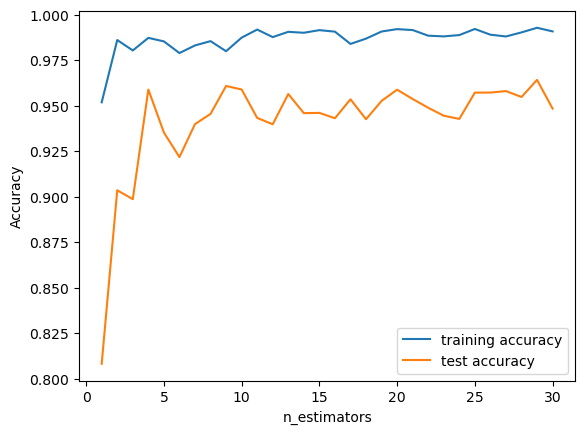

In [97]:
training_accuracy = []
test_accuracy = []
# try n_estimators from 1 to 30
est = range(1, 31)
for n in est:
  # fit the model
  br = BaggingRegressor(n_estimators=n)
  br.fit(X_train, y_train)
  # record training set accuracy
  training_accuracy.append(br.score(X_train, y_train))
  # record generalization accuracy
  test_accuracy.append(br.score(X_test, y_test))

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.plot(est, training_accuracy, label="training accuracy")
plt.plot(est, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_estimators")
plt.legend()

#### OBSERVATIONS: 
From the above plot, it is clear that the model performs very well on this dataset. Even with tuning of n_estimators parameters, the training accuracy always stayed above 99.5% & the test data accuracy is always above 99%. This may or may not be the case of overfitting.

## 6.7. Support Vector Regression

SVR uses the same basic idea as Support Vector Machine (SVM), a classification algorithm, but applies it to predict real values rather than a class. SVR acknowledges the presence of non-linearity in the data and provides a proficient prediction model.

In [98]:
#Supprt Vector machine regression model 
from sklearn.svm import SVR

# instantiate the model 
svr = SVR(kernel='rbf')
# fit the model 
svr.fit(X_train,y_train)

SVR()

In [99]:
#predicting the target value from the model for the samples
y_test_svr = svr.predict(X_test)
y_train_svr = svr.predict(X_train)

In [100]:
#computing the accuracy of the model performance
acc_train_svr = svr.score(X_train, y_train)
acc_test_svr = svr.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_svr = np.sqrt(mean_squared_error(y_train, y_train_svr))
rmse_test_svr = np.sqrt(mean_squared_error(y_test, y_test_svr))

print("SVM Regression: Accuracy on training Data: {:.3f}".format(acc_train_svr))
print("SVM Regression: Accuracy on test Data: {:.3f}".format(acc_test_svr))
print('\nSVM Regression: The RMSE of the training set is: ', rmse_train_svr)
print('SVM Regression: The RMSE of the testing set is: ', rmse_test_svr)

SVM Regression: Accuracy on training Data: -0.041
SVM Regression: Accuracy on test Data: -0.067

SVM Regression: The RMSE of the training set is:  0.756259175275849
SVM Regression: The RMSE of the testing set is:  0.6533543108559544


In [101]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Support Vector Regression',acc_train_svr, acc_test_svr, rmse_train_svr, rmse_test_svr)

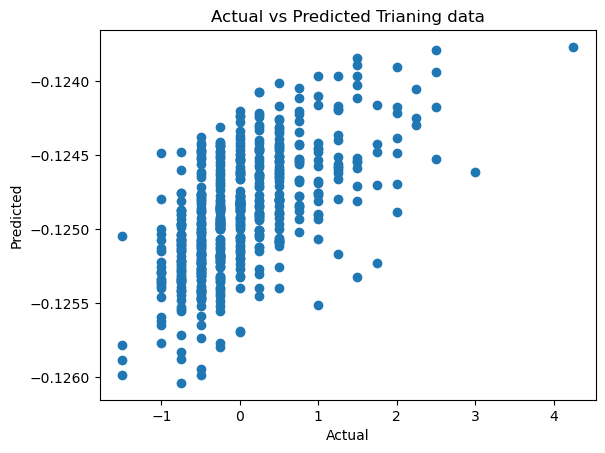

In [102]:
plt.scatter(y_train,y_train_svr)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Training data");

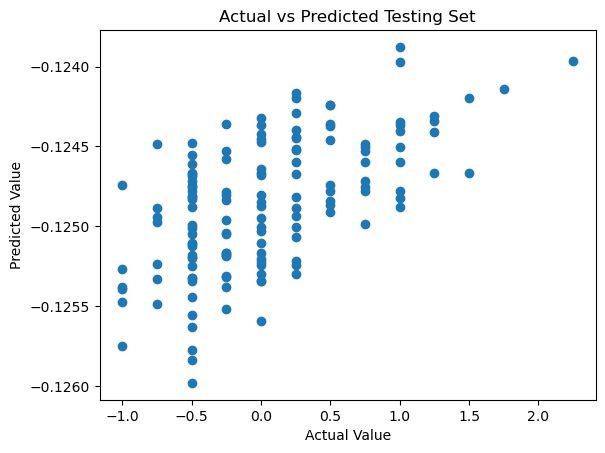

In [103]:
plt.scatter(y_test,y_test_svr)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Actual vs Predicted Testing Set");

#### OBSERVATIONS:

Support Vector Machine Regression gives 20% accuracy which is worst than other regression model. 



## 6.6. Multilayer Perceptrons (MLPs): Deep Learning
 Multilayer perceptrons (MLPs) are also known as (vanilla) feed-forward neural networks, or sometimes just neural networks. Multilayer perceptrons can be applied for both classification and regression problems.

   MLPs can be viewed as generalizations of linear models that perform multiple stages of processing to come to a decision.

In [104]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPRegressor

# instantiate the model
mlp = MLPRegressor(hidden_layer_sizes=([100,100]))

# fit the model 
mlp.fit(X_train, y_train)

C:\Users\Nedu\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=[100, 100])

In [105]:
#predicting the target value from the model for the samples
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

#### Performance Evaluation:

In [106]:
#computing the accuracy of the model performance
acc_train_mlp = mlp.score(X_train, y_train)
acc_test_mlp = mlp.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_mlp = np.sqrt(mean_squared_error(y_train, y_train_mlp))
rmse_test_mlp = np.sqrt(mean_squared_error(y_test, y_test_mlp))

print("Multilayer Perceptron Regression: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptron Regression: Accuracy on test Data: {:.3f}".format(acc_test_mlp))
print('\nMultilayer Perceptron Regression: The RMSE of the training set is: ', rmse_train_mlp)
print('Multilayer Perceptron Regression: The RMSE of the testing set is: ', rmse_test_mlp)

Multilayer Perceptron Regression: Accuracy on training Data: 0.390
Multilayer Perceptron Regression: Accuracy on test Data: 0.437

Multilayer Perceptron Regression: The RMSE of the training set is:  0.5788957558574678
Multilayer Perceptron Regression: The RMSE of the testing set is:  0.47485739587492315


#### Storing Results:

In [107]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Multilayer Perceptron Regression',acc_train_mlp, acc_test_mlp, rmse_train_mlp, rmse_test_mlp)

#### OBSERVATIONS: 
The model didnt overfit when trained without tuning any parameters. But, the model accuracy obtained is 88.4%.

So, hyperparameter tuning is performed for the model. The tuned parameters are number of hidden layers and the hidden_units of each layer with default values of alpha. The otimized Gradient Boosted model gives us an accuracy of 90.1%, with parameter tuning.

## 7. Comparision of Models:
   To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [108]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test,
    'Train RMSE': rmse_train,
    'Test RMSE': rmse_test})

In [110]:
#Sorting the dataframe on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False).reset_index(drop=True)

,ML Model,Train Accuracy,Test Accuracy,Train RMSE,Test RMSE
0,Linear Regression,0.984,0.984,0.094,0.081
1,Gradient Boosted Regression,1.000,0.981,0.007,0.086
2,Random Forest,0.991,0.946,0.071,0.147
3,Bagging Regression,0.991,0.929,0.071,0.169
4,Decision Tree,0.998,0.914,0.035,0.185
5,k-Nearest Neighbors Regression,1.000,0.747,0.000,0.318
6,Multilayer Perceptron Regression,0.390,0.437,0.579,0.475
7,Support Vector Regression,-0.041,-0.067,0.756,0.653


#### OBSERVATIONS: 
Among all the trained models, Linear regression, Gradient Boosted Regression and Random forest are better. It is understandable because linear regression model is very good in execution Speed & model performance.

### Storing best model :

In [111]:
import pickle

# dump information to that file
pickle.dump(br, open('pickle/model.pkl', 'wb'))


## 8. Statistical Tests:
Statistical tests are used in hypothesis testing. They can be used to:

1. determine whether a predictor variable has a statistically significant relationship with an outcome variable.
2. estimate the difference between two or more groups

### 8.1. Test 1: To check the difference in Percentage Addiction probability between male and female
Using independent sample t-test to check the difference in Percentage Addiction probability between male and female. The hypothesis statements for this test are:

1. H0: There is no difference in the Percentage Addiction probability between male and female (Null).
2. H1: There is difference in the Percentage Addiction probability between male and female (Alternate)

In [112]:
#collecting male Percentage Addiction probability data
male = data_frame2['Percentage_Addiction_probability'][data_frame2['Gender'] == 1]
print(male.size)
male

600


97     0.141566
112   -0.649721
111   -0.296997
110    1.638996
105   -0.044904
         ...   
691   -0.647563
688   -0.470310
687    1.050123
694    0.152043
743    2.295921
Name: Percentage_Addiction_probability, Length: 600, dtype: float64

In [113]:
#collecting female Percentage Addiction probability data
female = data_frame2['Percentage_Addiction_probability'][data_frame2['Gender'] == 0]
print(female.size)
female

100


113   -0.680177
109   -0.446677
108    0.675923
107   -0.772230
106    1.721982
         ...   
673    0.855539
669    0.114623
695   -0.824815
690   -0.098080
689   -0.597932
Name: Percentage_Addiction_probability, Length: 100, dtype: float64

In [114]:
print(len(male[:100]), len(female[:100]))

100 100


In [115]:
#calculating p value
from scipy import stats
ttest,pval = stats.ttest_rel(male[:100], female[:100])

if pval<0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

Accept null hypothesis


#### Test Conclusion: 
By performing T-test, the result obtained is to Accept the null hypothesis. This basically means that there is no different in Addiction probability for male & female.

### 8.2. Test 2: To find out the dependence of Percentage Addiction probability on the Gaming Start age.
Finding out whether there is a dependence of Percentage Addiction probability on the age using the Chi- Square test. The hypothesis statements for this test are:

1. H0: Percentage Addiction probability and Start Age are independent (Null).
2. H1: Percentage Addiction probability and Start Age are dependent (Alternate).

In [116]:
#Creating Contingency Table
contingency_table = pd.crosstab(data_frame2.gaming_start_age, data_frame2.Years)

In [117]:
#Significance Level 5%
alpha=0.05

In [118]:
chistat, p, dof, expected = stats.chi2_contingency(contingency_table )

In [119]:
#critical_value
critical_value=stats.chi2.ppf(q=1-alpha,df=dof)
print('critical_value:',critical_value)

critical_value: 456.0956786540966


In [120]:
print('Significance level: ',alpha)
print('Degree of Freedom: ',dof)
print('chi-square statistic:',chistat)
print('critical_value:',critical_value)
print('p-value:',p) 

Significance level:  0.05
Degree of Freedom:  408
chi-square statistic: 3238.163824476606
critical_value: 456.0956786540966
p-value: 0.0


Here, pvalue = 0.0 and a low pvalue suggests that your sample 
provides enough evidence that you can reject  H0  for the entire population.

In [121]:
#compare chi_square_statistic with critical_value and p-value which is the 
 #probability of getting chi-square>0.09 (chi_square_statistic)
if chistat>=critical_value:
    print("Reject H0,There is a dependency between Start Age & Percentage Addiction probability.")
else:
    print("Retain H0,There is no relationship between Start Age & Percentage Addiction probability.")
    
if p<=alpha:
    print("Reject H0,There is a dependency between Start Age & Percentage Addiction probability.")
else:
    print("Retain H0,There is no relationship between Start Age & Percentage Addiction probability.")


Reject H0,There is a dependency between Start Age & Percentage Addiction probability.
Reject H0,There is a dependency between Start Age & Percentage Addiction probability.


#### Test Conclusion: 
By performing Chi- Square test, the result obtained is to reject the null hypothesis. This basically means that there is dependency between Start Age & Percentage Addiction probability.

## 9. Conclusion: 
The final takeaway from this project is the ability to run various machine learning models on a dataset and comprehend their parameters. Creating this notebook assisted me in learning a lot about model parameters, how to tune them, and how they affect model performance. The Gaming dataset's final conclusions are that the probability of game addition is gender agnostic, but males are more likely to be addicted to gaming than females because males play more games. The age at which people begin gaming has a significant impact on how long they play the game.